# Setting jupyter

In [2]:
# # Avoid "JavaScript heap out of memory" errors during extension installation
# # (OS X/Linux)
# # ! export NODE_OPTIONS=--max-old-space-size=4096
# # (Windows)
# # ! set NODE_OPTIONS=--max-old-space-size=4096

# # Jupyter widgets extension
# ! jupyter labextension install @jupyter-widgets/jupyterlab-manager@1.0 --no-build

# # FigureWidget support
# ! jupyter labextension install plotlywidget@1.1.0 --no-build

# # and jupyterlab renderer support
# ! jupyter labextension install jupyterlab-plotly@1.1.0 --no-build

# # JupyterLab chart editor support (optional)
# ! jupyter labextension install jupyterlab-chart-editor@1.2 --no-build

# # Build extensions (must be done to activate extensions since --no-build is used above)
# ! jupyter lab build

# # Unset NODE_OPTIONS environment variable
# # (OS X/Linux)
# ! unset NODE_OPTIONS

In [5]:
from ipywidgets import widgets
from IPython.display import display, clear_output, Image

# Importing libs

In [1]:
# ! pip install plotly

In [2]:
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD

ModuleNotFoundError: No module named 'plotly.express'

In [7]:
from plotly import graph_objects as go

fig = go.Figure(go.Funnelarea(
    text = ["Read data","Pre-processing", "EAD", "PCA", "Predicting"],
    values = [2, 13, 5, 1, 1]
    ))
fig.show()

ImportError: cannot import name 'graph_objects'

# Read and checking data

In [120]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')

In [121]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

### Optimizing memory usage

In [122]:
# select object column's names
object_cols = list(train.columns[train.dtypes=='object'])

# list with 43 categories
cat_type = ['category' for i in range(len(object_cols))]

# dictionary containing categorical col names
dtypes = dict(zip(object_cols, cat_type))

In [123]:
dtypes

{'MSZoning': 'category',
 'Street': 'category',
 'Alley': 'category',
 'LotShape': 'category',
 'LandContour': 'category',
 'Utilities': 'category',
 'LotConfig': 'category',
 'LandSlope': 'category',
 'Neighborhood': 'category',
 'Condition1': 'category',
 'Condition2': 'category',
 'BldgType': 'category',
 'HouseStyle': 'category',
 'RoofStyle': 'category',
 'RoofMatl': 'category',
 'Exterior1st': 'category',
 'Exterior2nd': 'category',
 'MasVnrType': 'category',
 'ExterQual': 'category',
 'ExterCond': 'category',
 'Foundation': 'category',
 'BsmtQual': 'category',
 'BsmtCond': 'category',
 'BsmtExposure': 'category',
 'BsmtFinType1': 'category',
 'BsmtFinType2': 'category',
 'Heating': 'category',
 'HeatingQC': 'category',
 'CentralAir': 'category',
 'Electrical': 'category',
 'KitchenQual': 'category',
 'Functional': 'category',
 'FireplaceQu': 'category',
 'GarageType': 'category',
 'GarageFinish': 'category',
 'GarageQual': 'category',
 'GarageCond': 'category',
 'PavedDrive': 'c

In [124]:
# read data using the parameter dtype
train = pd.read_csv('train.csv', 
                    index_col='Id',
                   dtype=dtypes)

test = pd.read_csv('test.csv', 
                   index_col='Id',
                  dtype=dtypes)

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null category
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null category
Alley            91 non-null category
LotShape         1460 non-null category
LandContour      1460 non-null category
Utilities        1460 non-null category
LotConfig        1460 non-null category
LandSlope        1460 non-null category
Neighborhood     1460 non-null category
Condition1       1460 non-null category
Condition2       1460 non-null category
BldgType         1460 non-null category
HouseStyle       1460 non-null category
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null category
RoofMatl         1460 non-null category
Exterior1st      1460 non-null cat

### Checking data

In [126]:
train.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  

[1 rows x 80 columns]

In [127]:
test.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1461         NaN       0       6    2010        WD         Normal  

[1 rows x 79 columns]

In [128]:
train.shape

(1460, 80)

In [129]:
test.shape

(1459, 79)

### Handling missing data

In [130]:
# returns the absolute and relative number of NA cases
def na_percent(df):
    null = df.isnull().sum()
    null_percent = round(null/df.shape[0] *100)
    df_na = pd.DataFrame([null, null_percent]).T
    df_na.columns = ['n_NA', 'percent_NA']
    df_na = df_na.sort_values(by='n_NA', ascending=False)
    return(df_na)

In [131]:
na_train_cols = na_percent(train)
na_train_cols.head(20)

n_NA  percent_NA
PoolQC        1453.0       100.0
MiscFeature   1406.0        96.0
Alley         1369.0        94.0
Fence         1179.0        81.0
FireplaceQu    690.0        47.0
LotFrontage    259.0        18.0
GarageYrBlt     81.0         6.0
GarageCond      81.0         6.0
GarageType      81.0         6.0
GarageFinish    81.0         6.0
GarageQual      81.0         6.0
BsmtExposure    38.0         3.0
BsmtFinType2    38.0         3.0
BsmtCond        37.0         3.0
BsmtQual        37.0         3.0
BsmtFinType1    37.0         3.0
MasVnrArea       8.0         1.0
MasVnrType       8.0         1.0
Electrical       1.0         0.0
MSSubClass       0.0         0.0

### drop or not to drop

In [132]:
# select cols with more than 70% of missing values
na_40 = list(na_train_cols[na_train_cols.percent_NA > 40].index)

print(na_40)

['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


In [133]:
# returm columns family
def cols_family(col, df=train):
    cols_fam = list(df.columns[df.columns.str.contains(col)])
    return(cols_fam)

In [134]:
drop_family = [
    # recognize the first 4 letters and search for variables with same string pattern
    cols_family(i[0:4]) for i in na_40]

# flatten the nested list
drop_cols = [i_1 for i_0 in drop_family for i_1 in i_0]

In [135]:
print(drop_cols)

['PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'Fireplaces', 'FireplaceQu']


In [136]:
len(drop_cols)

8

In [137]:
# drop columns with more than 70% of missing data
train = train.drop(drop_cols, axis=1)

In [138]:
train.shape

(1460, 72)

In [139]:
na_percent(train).head(13)

n_NA  percent_NA
LotFrontage   259.0        18.0
GarageType     81.0         6.0
GarageYrBlt    81.0         6.0
GarageFinish   81.0         6.0
GarageQual     81.0         6.0
GarageCond     81.0         6.0
BsmtFinType2   38.0         3.0
BsmtExposure   38.0         3.0
BsmtCond       37.0         3.0
BsmtQual       37.0         3.0
BsmtFinType1   37.0         3.0
MasVnrArea      8.0         1.0
MasVnrType      8.0         1.0

### fillna

In [140]:
train['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [141]:
# fill na with the column mean
train['LotFrontage'] = train.LotFrontage.fillna(np.mean(train.LotFrontage))

In [142]:
train['LotFrontage'].describe()

count    1460.000000
mean       70.049958
std        22.024023
min        21.000000
25%        60.000000
50%        70.049958
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [143]:
na_percent(train).head(13)

n_NA  percent_NA
GarageType    81.0         6.0
GarageYrBlt   81.0         6.0
GarageFinish  81.0         6.0
GarageQual    81.0         6.0
GarageCond    81.0         6.0
BsmtFinType2  38.0         3.0
BsmtExposure  38.0         3.0
BsmtQual      37.0         3.0
BsmtFinType1  37.0         3.0
BsmtCond      37.0         3.0
MasVnrType     8.0         1.0
MasVnrArea     8.0         1.0
Electrical     1.0         0.0

In [144]:
# drop lines
train = train.dropna()

In [145]:
train.shape

(1338, 72)

In [146]:
na_percent(train).head(13)

n_NA  percent_NA
MSSubClass     0.0         0.0
MSZoning       0.0         0.0
TotRmsAbvGrd   0.0         0.0
KitchenQual    0.0         0.0
KitchenAbvGr   0.0         0.0
BedroomAbvGr   0.0         0.0
HalfBath       0.0         0.0
FullBath       0.0         0.0
BsmtHalfBath   0.0         0.0
BsmtFullBath   0.0         0.0
GrLivArea      0.0         0.0
LowQualFinSF   0.0         0.0
2ndFlrSF       0.0         0.0

In [147]:
## identify datatime variables
date_time_cols = cols_family('Year|Yr')

In [148]:
date_time_cols

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [149]:
# transform year into datetime variables
for i in date_time_cols:
    train[i+'Date'] = pd.to_datetime(train[i], format='%Y')

In [150]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   
2           20       RL         80.0     9600   Pave      Reg         Lvl   
3           60       RL         68.0    11250   Pave      IR1         Lvl   
4           70       RL         60.0     9550   Pave      IR1         Lvl   
5           60       RL         84.0    14260   Pave      IR1         Lvl   

   Utilities LotConfig LandSlope  ... ScreenPorch MoSold YrSold SaleType  \
Id                                ...                                      
1     AllPub    Inside       Gtl  ...           0      2   2008       WD   
2     AllPub       FR2       Gtl  ...           0      5   2007       WD   
3     AllPub    Inside       Gtl  ...           0      9   2008       WD   
4     AllPub    Corner       Gtl  ...           0      2   2006       WD   
5     AllPub       FR2       Gtl  ...           0     12   2008       WD   

   SaleCondition  SalePrice  YearBuiltDate  YearRemodAddDate  GarageYrBltDate  \
Id                                                                              
1         Normal     208500     2003-01-01        2003-01-01       2003-01-01   
2         Normal     181500     1976-01-01        1976-01-01       1976-01-01   
3         Normal     223500     2001-01-01        2002-01-01       2001-01-01   
4        Abnorml     140000     1915-01-01        1970-01-01       1998-01-01   
5         Normal     250000     2000-01-01        2000-01-01       2000-01-01   

   YrSoldDate  
Id             
1  2008-01-01  
2  2007-01-01  
3  2008-01-01  
4  2006-01-01  
5  2008-01-01  

[5 rows x 76 columns]

In [151]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1460
Data columns (total 76 columns):
MSSubClass          1338 non-null int64
MSZoning            1338 non-null category
LotFrontage         1338 non-null float64
LotArea             1338 non-null int64
Street              1338 non-null category
LotShape            1338 non-null category
LandContour         1338 non-null category
Utilities           1338 non-null category
LotConfig           1338 non-null category
LandSlope           1338 non-null category
Neighborhood        1338 non-null category
Condition1          1338 non-null category
Condition2          1338 non-null category
BldgType            1338 non-null category
HouseStyle          1338 non-null category
OverallQual         1338 non-null int64
OverallCond         1338 non-null int64
YearBuilt           1338 non-null int64
YearRemodAdd        1338 non-null int64
RoofStyle           1338 non-null category
RoofMatl            1338 non-null category
Exterior1

### create new features

In [152]:
for i in date_time_cols:
    train['Age'+i] = 2019 - train[i]

In [153]:
train.head(1)

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                          
1           60       RL         65.0     8450   Pave      Reg         Lvl   

   Utilities LotConfig LandSlope  ... SaleCondition SalePrice YearBuiltDate  \
Id                                ...                                         
1     AllPub    Inside       Gtl  ...        Normal    208500    2003-01-01   

   YearRemodAddDate GarageYrBltDate  YrSoldDate  AgeYearBuilt  \
Id                                                              
1        2003-01-01      2003-01-01  2008-01-01            16   

    AgeYearRemodAdd  AgeGarageYrBlt AgeYrSold  
Id                                             
1                16            16.0        11  

[1 rows x 80 columns]

In [154]:
# transform date_time_cols into category
for i in date_time_cols:
    train[i] = train[i].astype('category')

In [155]:
age_train = train[train.columns[train.columns.str.contains('Age')]].describe()

In [156]:
age_train

AgeYearBuilt  AgeYearRemodAdd  AgeGarageYrBlt    AgeYrSold
count   1338.000000      1338.000000     1338.000000  1338.000000
mean      45.970852        33.331091       40.403587    11.194320
std       29.563540        20.296463       24.773741     1.330691
min        9.000000         9.000000        9.000000     9.000000
25%       18.000000        15.000000       17.000000    10.000000
50%       43.000000        24.500000       39.000000    11.000000
75%       63.000000        51.000000       57.000000    12.000000
max      139.000000        69.000000      119.000000    13.000000

### Get started

- peason's correlation

In [157]:
# select numeric columns
train_nun = train.select_dtypes(include=['int', 'float'])

In [158]:
# after transforming, the dataset has 34 ints and 3 floats
train_nun.dtypes.value_counts()

int64      31
float64     3
dtype: int64

In [159]:
# gambiarra
y = train_nun.SalePrice
train_nun = train_nun.drop('SalePrice', axis=1)

train_nun = train_nun.join(y)

In [160]:
# calculate correlations
corr = train_nun.corr()

# sort data by SalesPrice
corr = corr.sort_values(by='SalePrice', ascending=False)

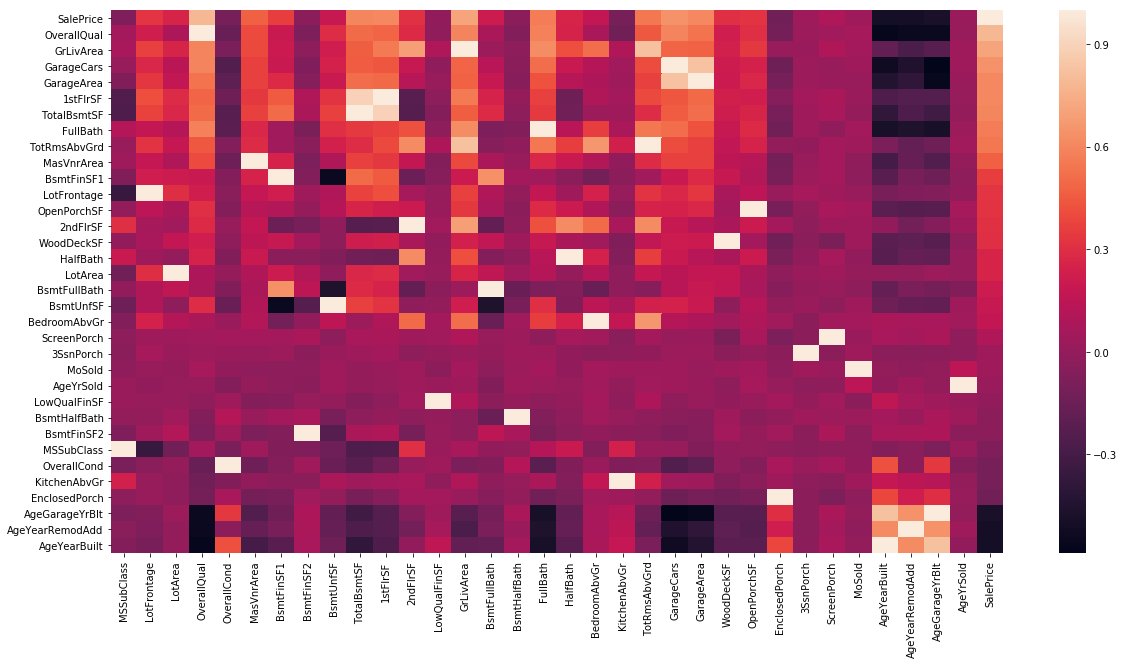

In [162]:
# plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr);

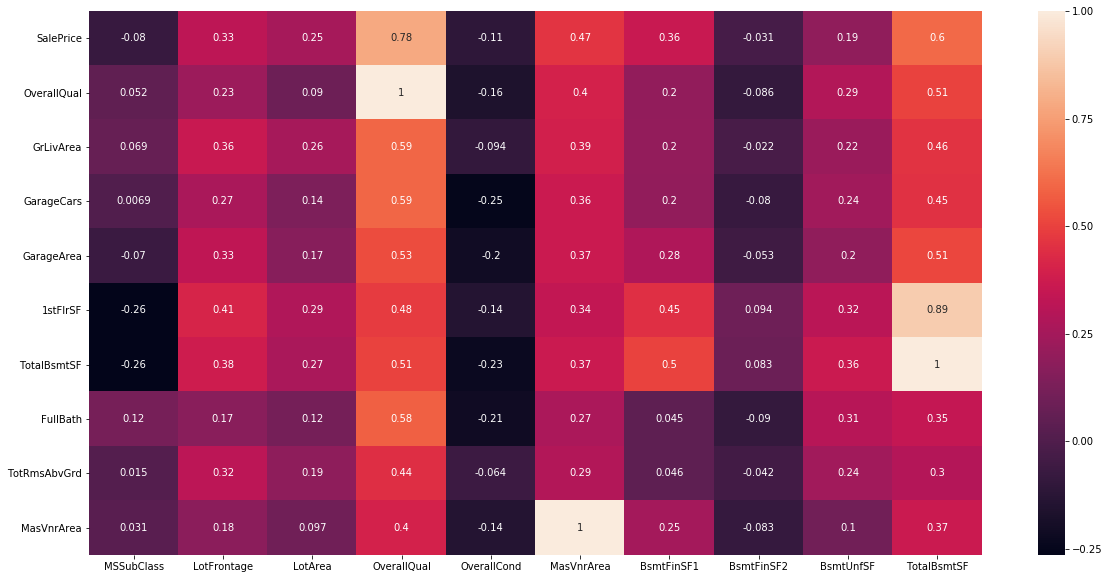

In [164]:
# plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(corr.iloc[0:10, 0:10], annot=True);

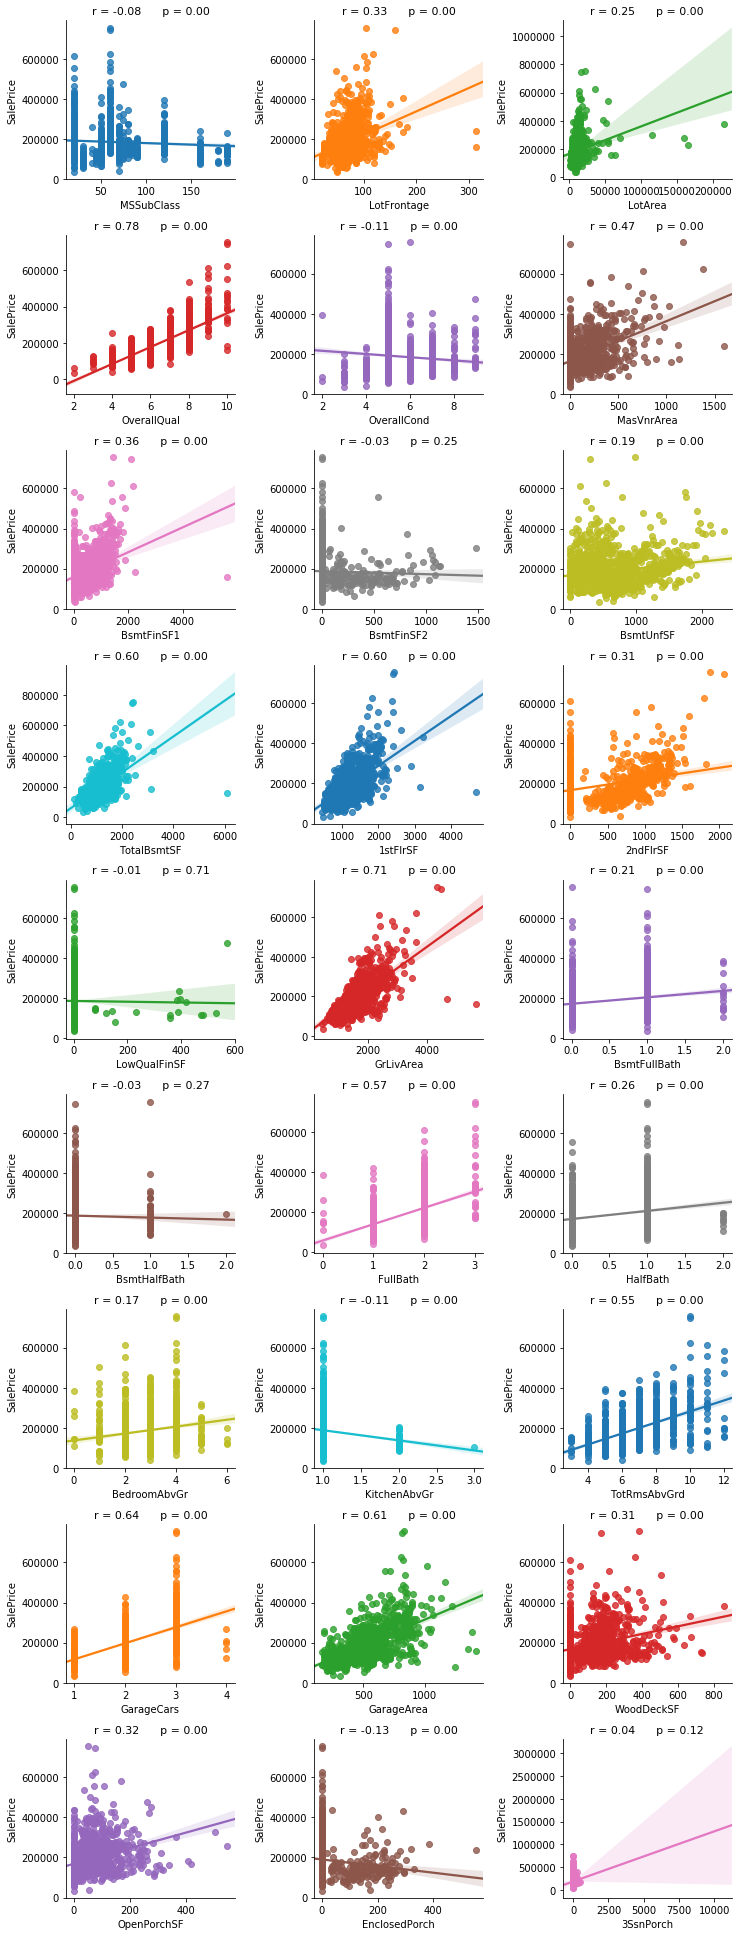

In [165]:
from scipy import stats

# plot columns individual correlation

nr_rows = 9
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

li_num_feats = list(train_nun)
li_not_plot = ['Id', 'SalePrice', 'SalePrice_Log']
li_plot_num_feats = [c for c in list(train_nun) if c not in li_not_plot]


for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_plot_num_feats):
            sns.regplot(train[li_plot_num_feats[i]], train['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(train[li_plot_num_feats[i]], train['SalePrice'])
            #axs[r][c].text(0.4,0.9,"title",fontsize=7)
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
sns.despine()
plt.show()

# EAD

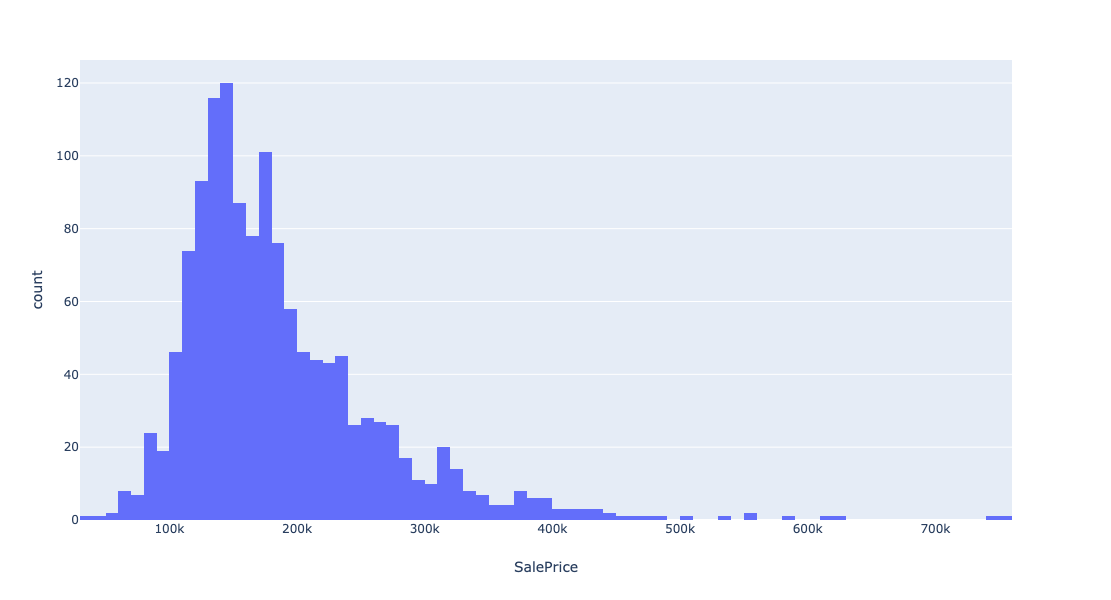

In [166]:
px.histogram(train, x='SalePrice')

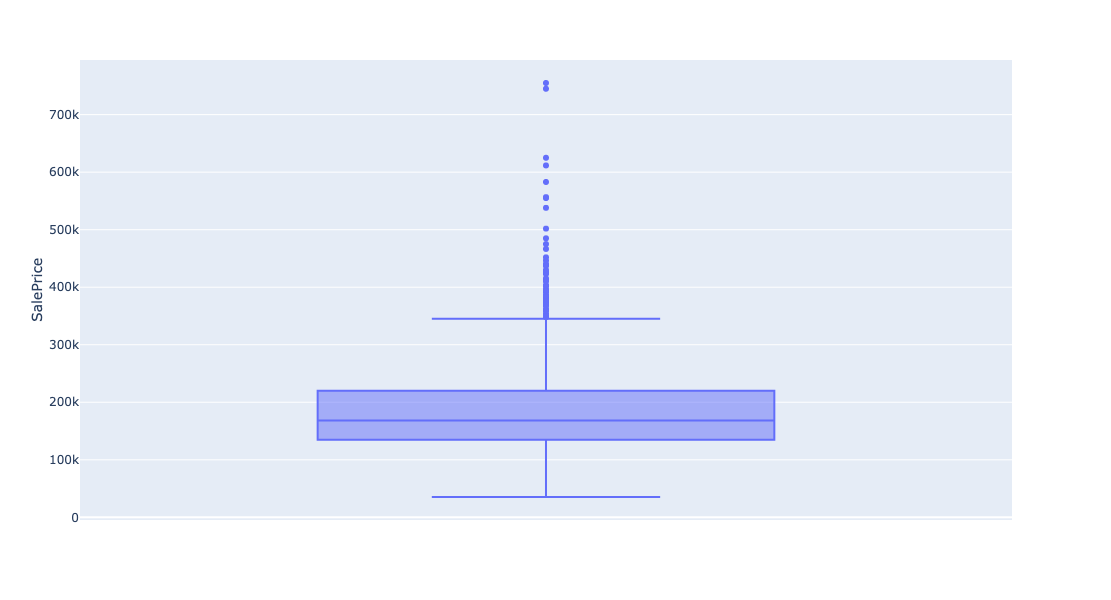

In [167]:
px.box(train, y='SalePrice')

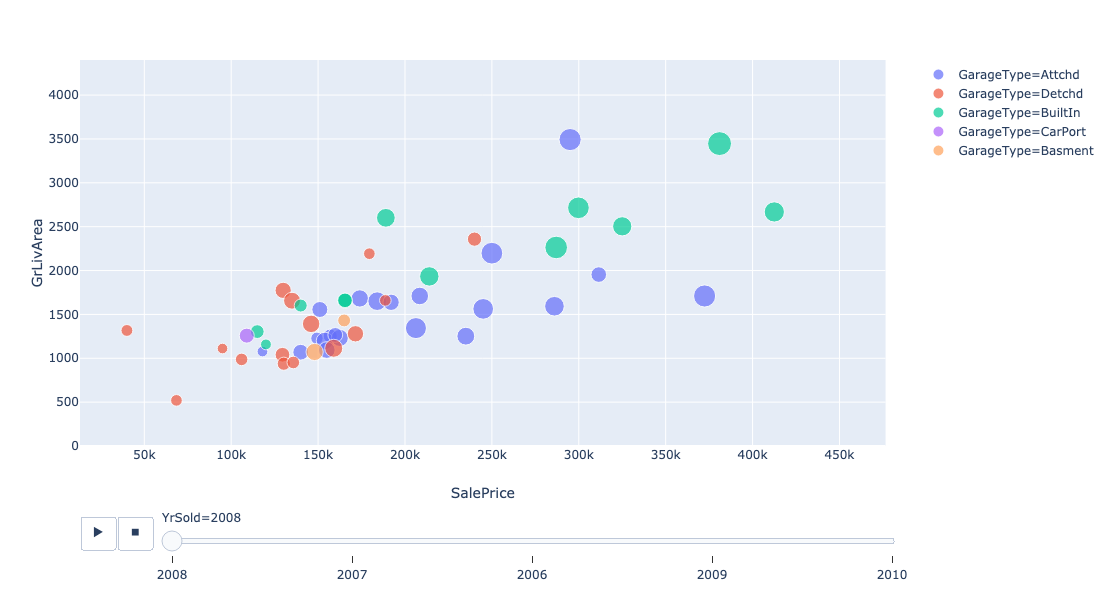

In [168]:
px.scatter(train, x="SalePrice", 
           y="GrLivArea", 
           animation_frame="YrSold", 
           animation_group="Neighborhood",
           size="GarageArea", 
           color="GarageType", 
           hover_name="Neighborhood",
#            size_max=55, 
#            range_x=[100,10000], 
            range_y=[0,4400])
#          )

In [182]:
# return a dataframe grouped by col returning median()
def pre_chart(col, data=train, y='SalePrice'):
    df = pd.DataFrame(
        # count values from Neighborhood
        [train[col].value_counts(),
         # return median price by Neighborhood
         round(train.groupby(col)[y].median())]
    # transpose, reset the index and sort values by SalePrice
    ).T.reset_index().sort_values(by=y, ascending=False)
    df['cut_price'] = pd.cut(df[y], bins=4)
    return(df)

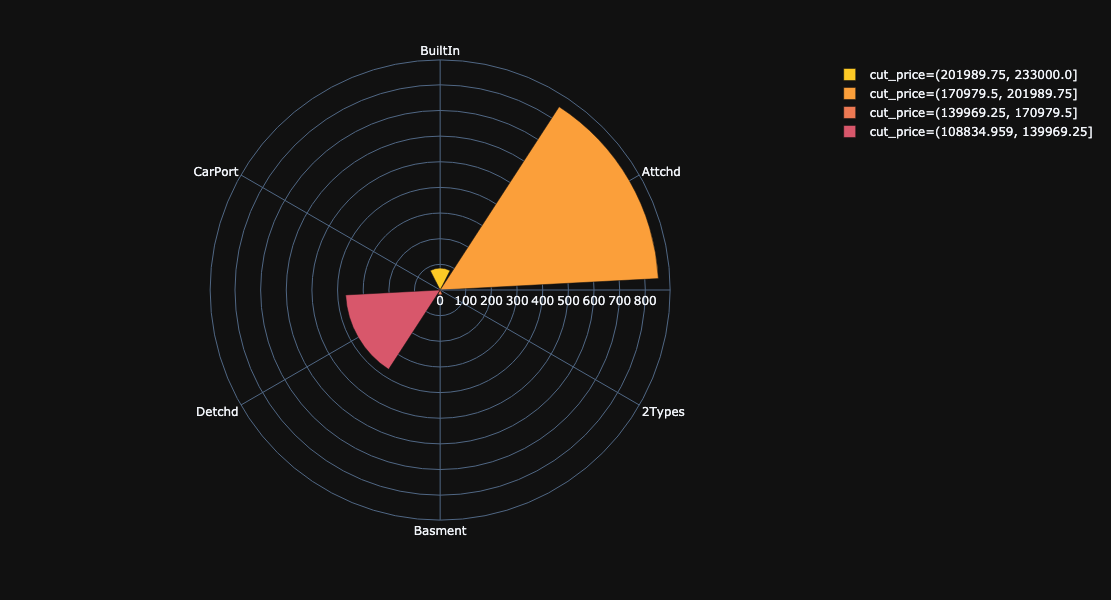

In [187]:
garage_type = pre_chart('GarageType')

fig = px.bar_polar(garage_type, r="GarageType", 
                   theta="index", 
                   color="cut_price", 
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

In [183]:
Neighborhood = pre_chart('Neighborhood')

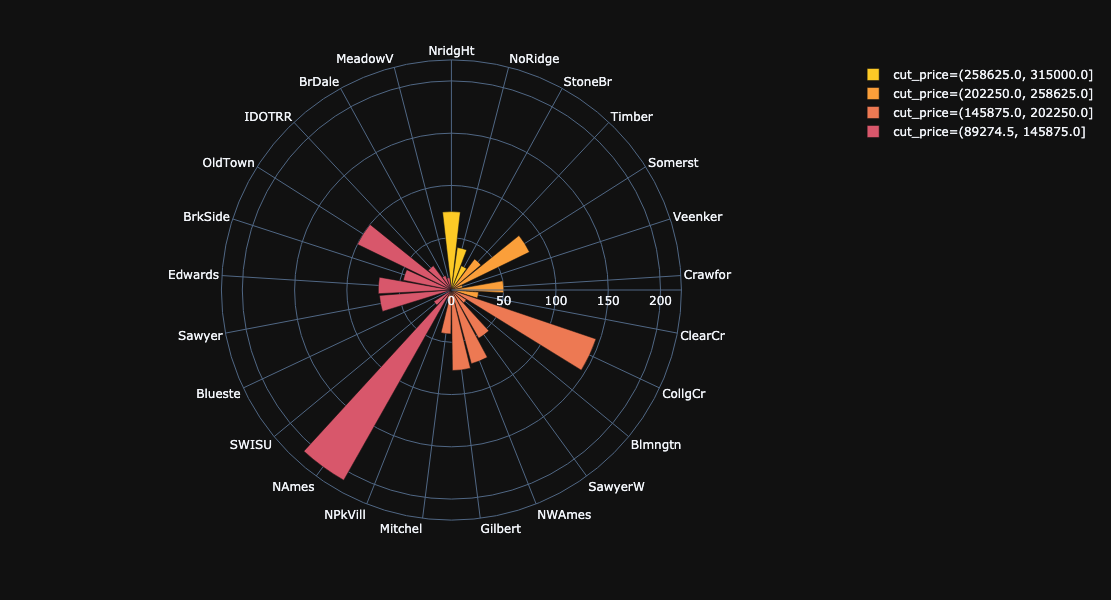

In [184]:
fig = px.bar_polar(Neighborhood, r="Neighborhood", 
                   theta="index", 
                   color="cut_price", 
                   template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma[-2::-1])
fig.show()

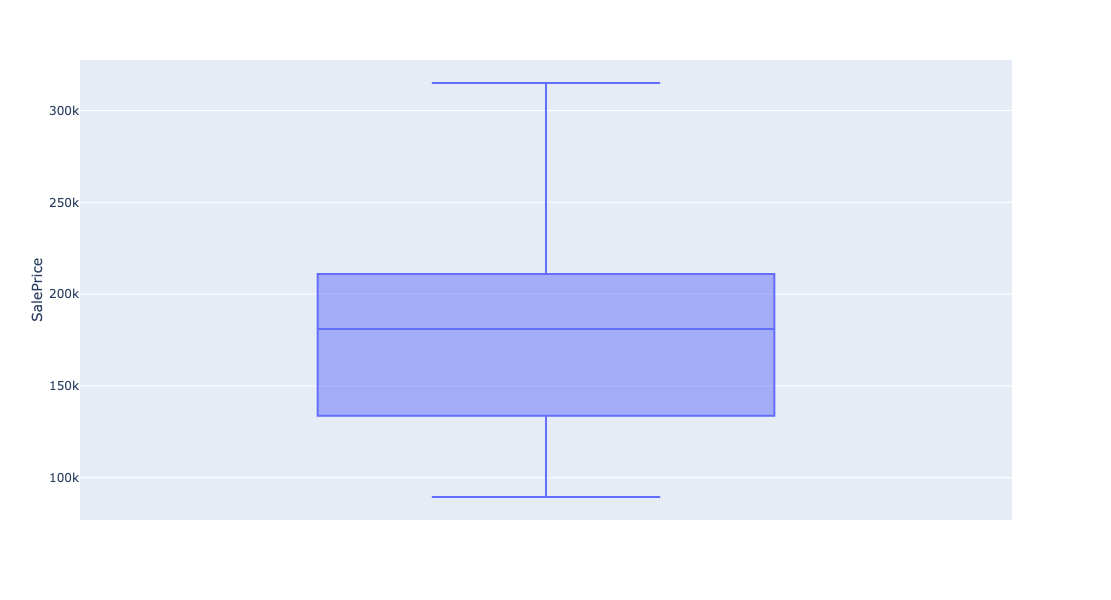

In [185]:
px.box(Neighborhood, y='SalePrice')

### Quantitative data

In [169]:
describe_train = round(train.describe())

In [170]:
describe_train

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
count      1338.0       1338.0    1338.0       1338.0       1338.0   
mean         56.0         71.0   10706.0          6.0          6.0   
std          41.0         22.0   10337.0          1.0          1.0   
min          20.0         21.0    1300.0          2.0          2.0   
25%          20.0         60.0    7744.0          5.0          5.0   
50%          50.0         70.0    9600.0          6.0          5.0   
75%          70.0         80.0   11761.0          7.0          6.0   
max         190.0        313.0  215245.0         10.0          9.0   

       MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  \
count      1338.0      1338.0      1338.0     1338.0       1338.0  ...   
mean        110.0       464.0        49.0      582.0       1096.0  ...   
std         186.0       459.0       166.0      440.0        406.0  ...   
min           0.0         0.0         0.0        0.0        105.0  ...   
25%           0.0         0.0         0.0      248.0        820.0  ...   
50%           0.0       413.0         0.0      489.0       1022.0  ...   
75%         174.0       733.0         0.0      816.0       1324.0  ...   
max        1600.0      5644.0      1474.0     2336.0       6110.0  ...   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  MoSold  SalePrice  \
count       1338.0         1338.0     1338.0       1338.0  1338.0     1338.0   
mean          48.0           21.0        4.0         16.0     6.0   186762.0   
std           65.0           61.0       30.0         58.0     3.0    78914.0   
min            0.0            0.0        0.0          0.0     1.0    35311.0   
25%            0.0            0.0        0.0          0.0     5.0   135000.0   
50%           28.0            0.0        0.0          0.0     6.0   168500.0   
75%           70.0            0.0        0.0          0.0     8.0   220000.0   
max          547.0          552.0      508.0        480.0    12.0   755000.0   

       AgeYearBuilt  AgeYearRemodAdd  AgeGarageYrBlt  AgeYrSold  
count        1338.0           1338.0          1338.0     1338.0  
mean           46.0             33.0            40.0       11.0  
std            30.0             20.0            25.0        1.0  
min             9.0              9.0             9.0        9.0  
25%            18.0             15.0            17.0       10.0  
50%            43.0             24.0            39.0       11.0  
75%            63.0             51.0            57.0       12.0  
max           139.0             69.0           119.0       13.0  

[8 rows x 34 columns]

### Qualitative data

In [171]:
# # Plot bar plot for each categorical feature

# for feature in train.dtypes[train.dtypes == 'object'].index:
#     sns.countplot(y=feature, data=train)
#     sns.despine()
#     plt.show()

In [172]:
from plotly import graph_objs as go

def chart(col, data=train):
    fig = go.Figure(
        data=[go.Bar(y=data[col].value_counts())],
        layout_title_text=str(col))
    return(fig.show())

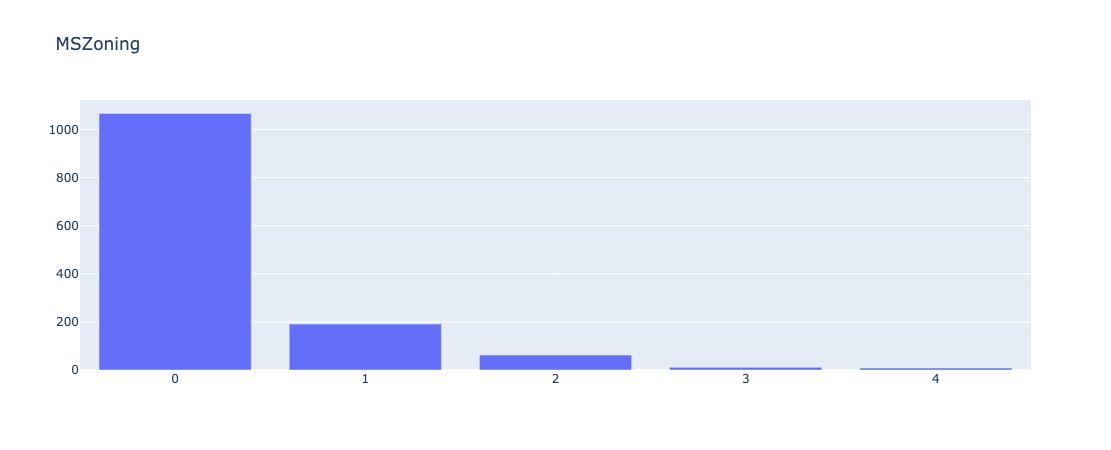

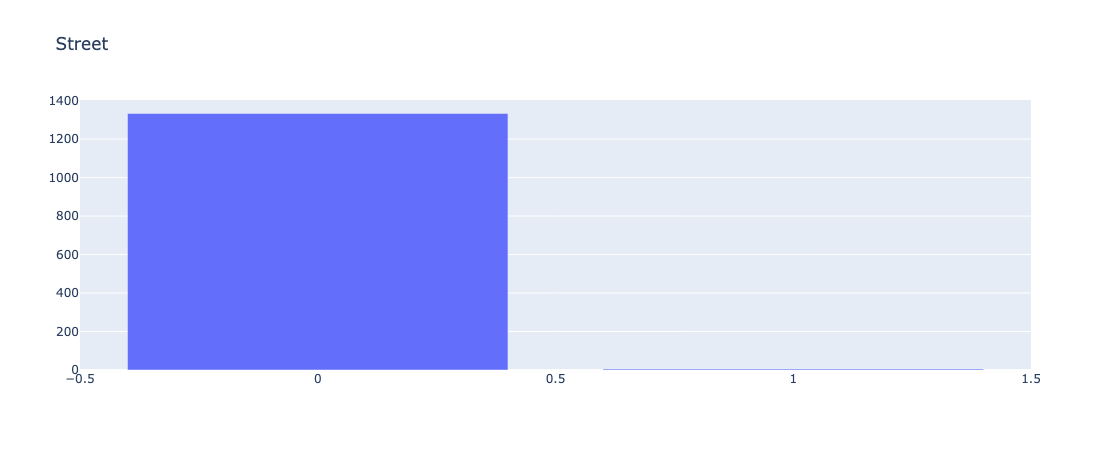

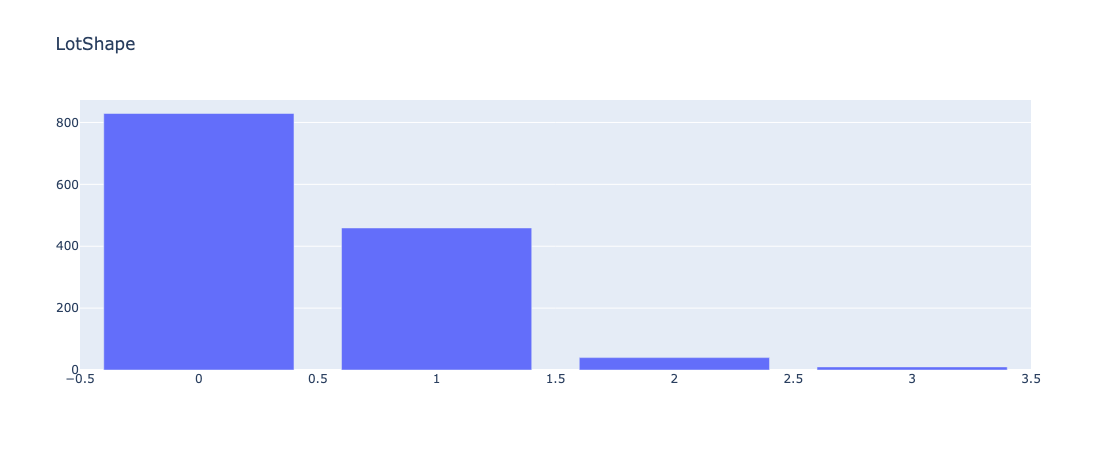

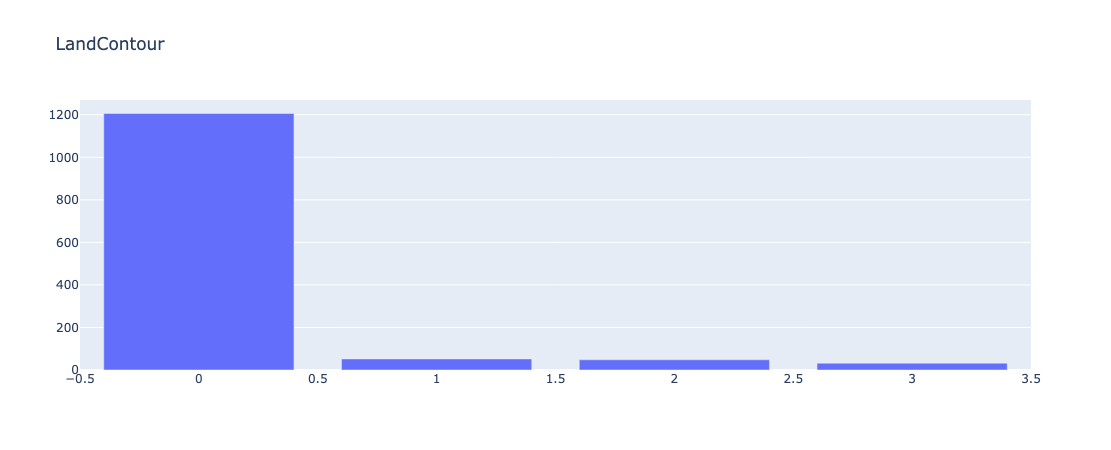

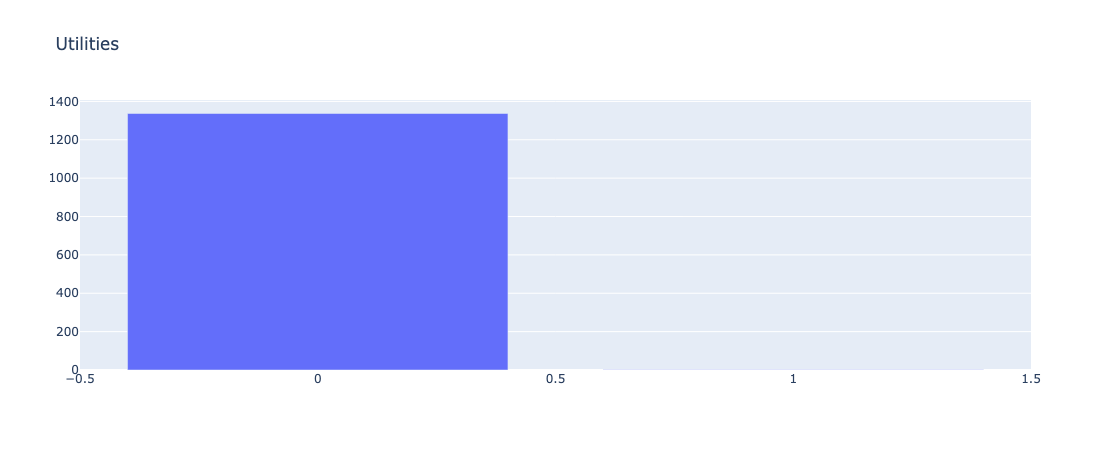

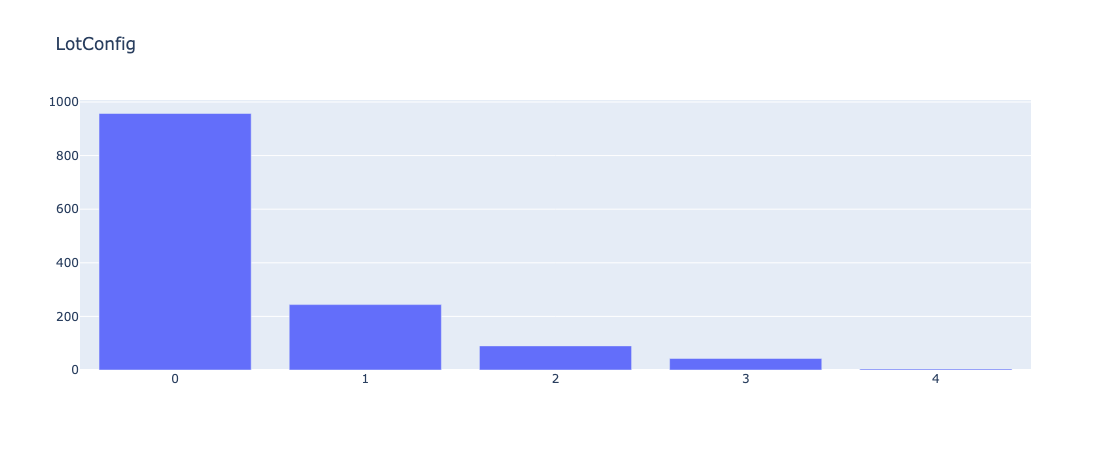

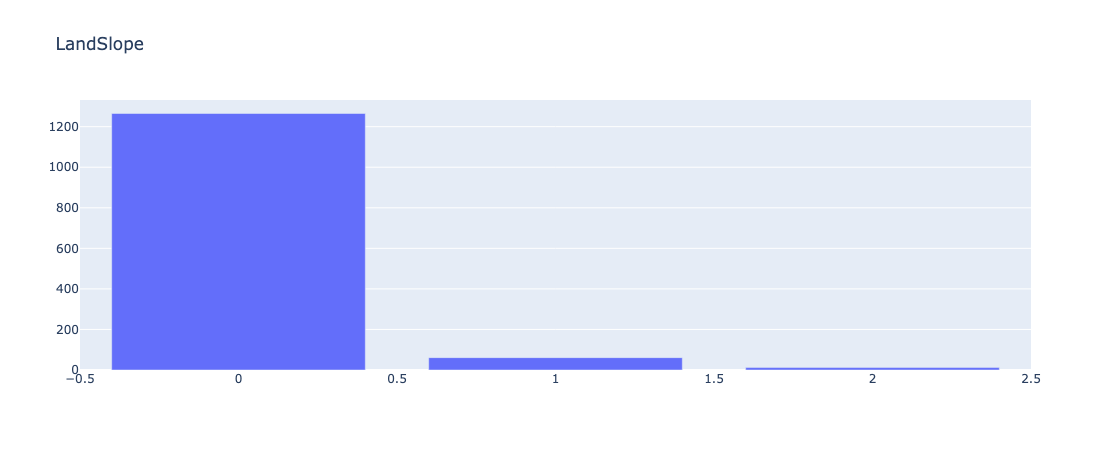

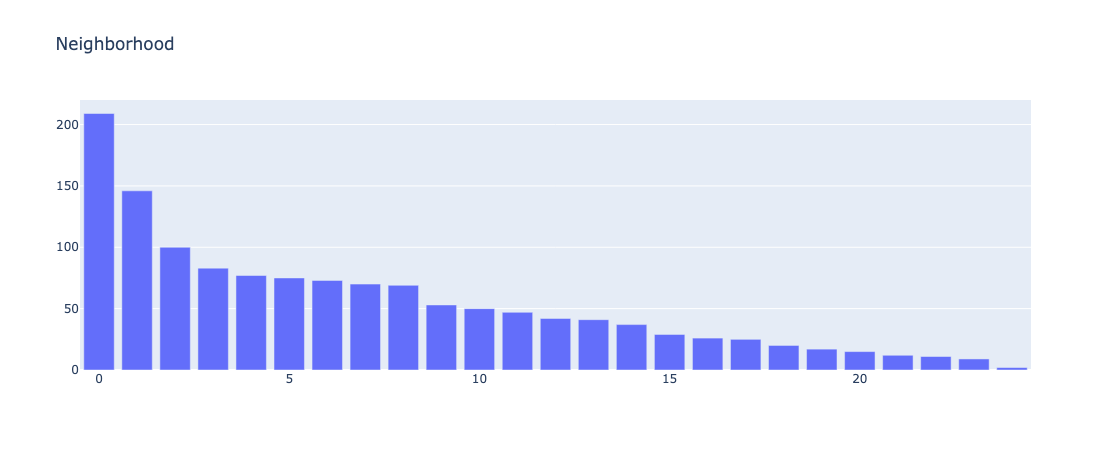

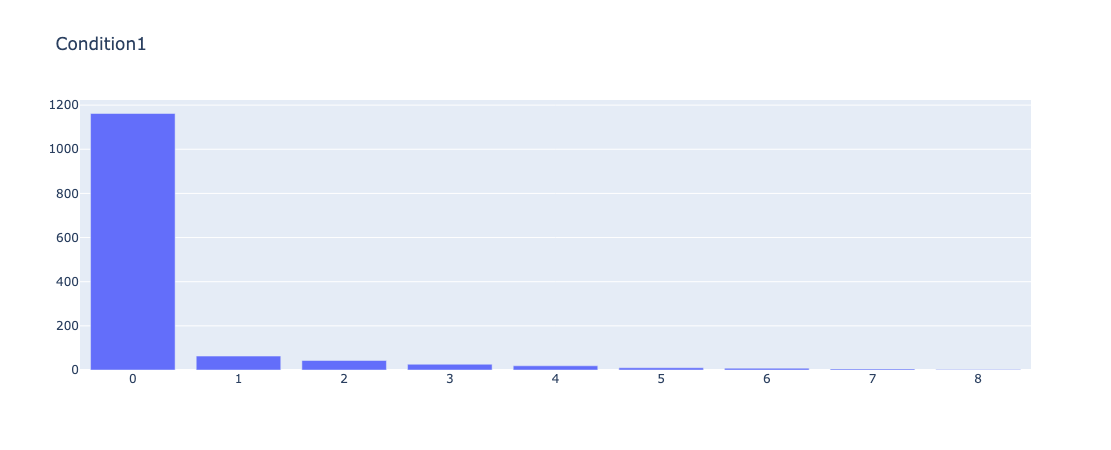

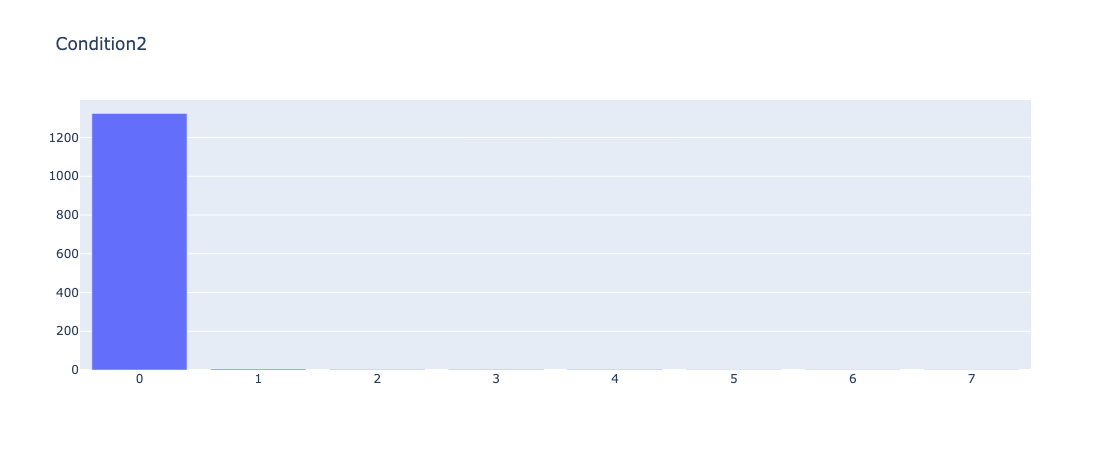

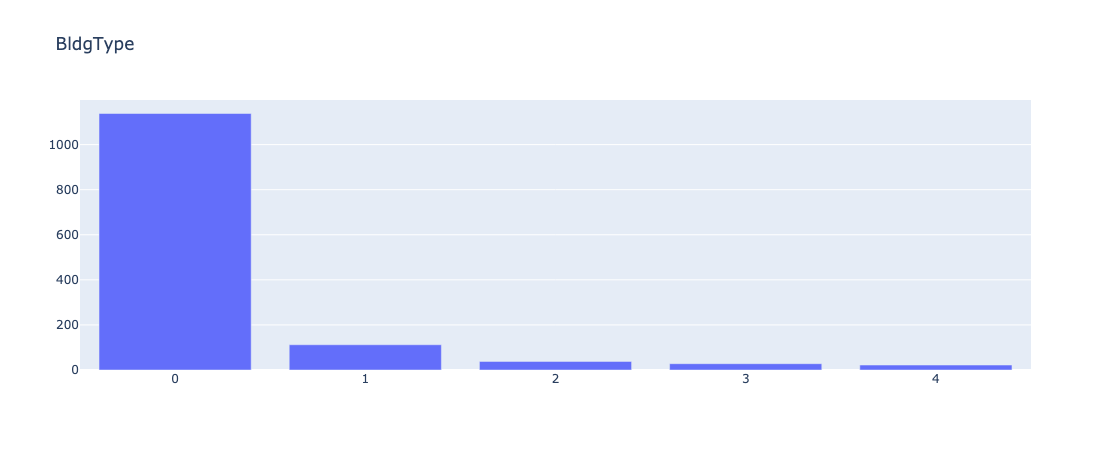

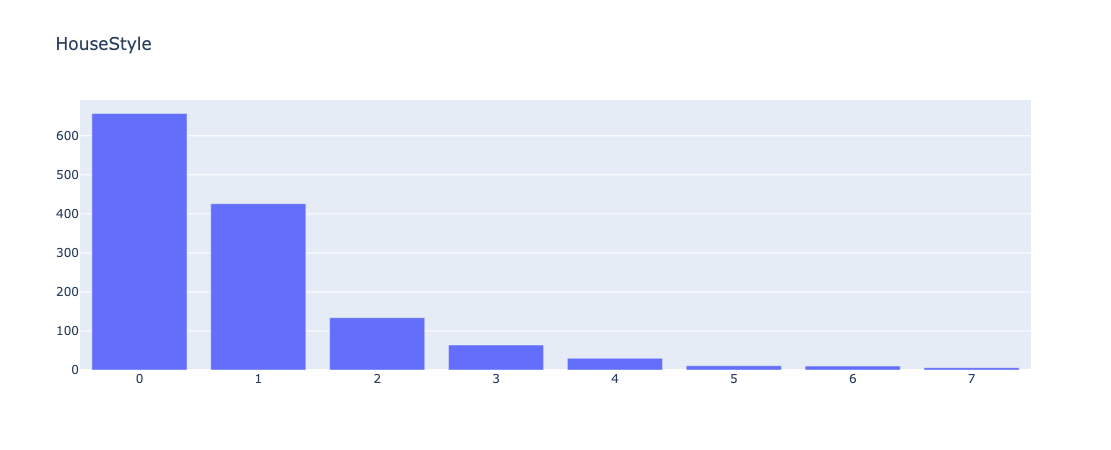

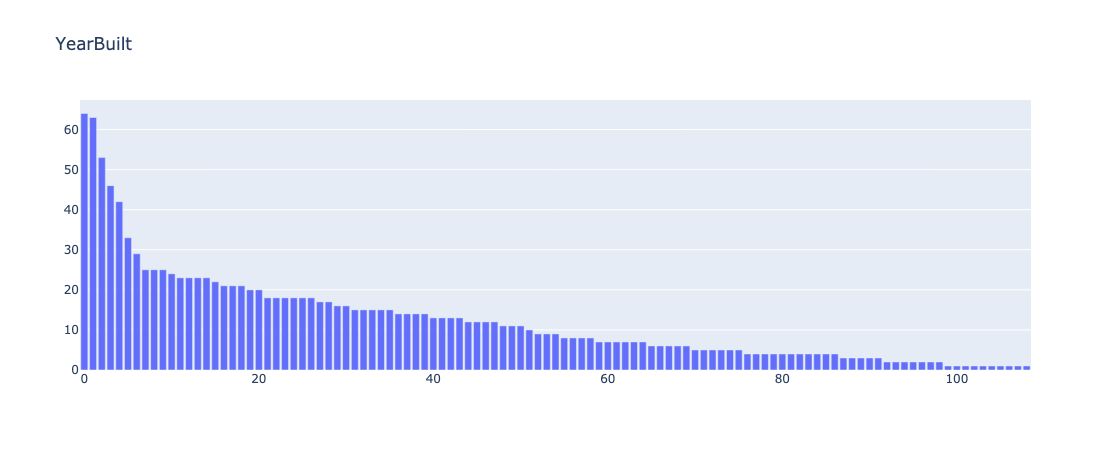

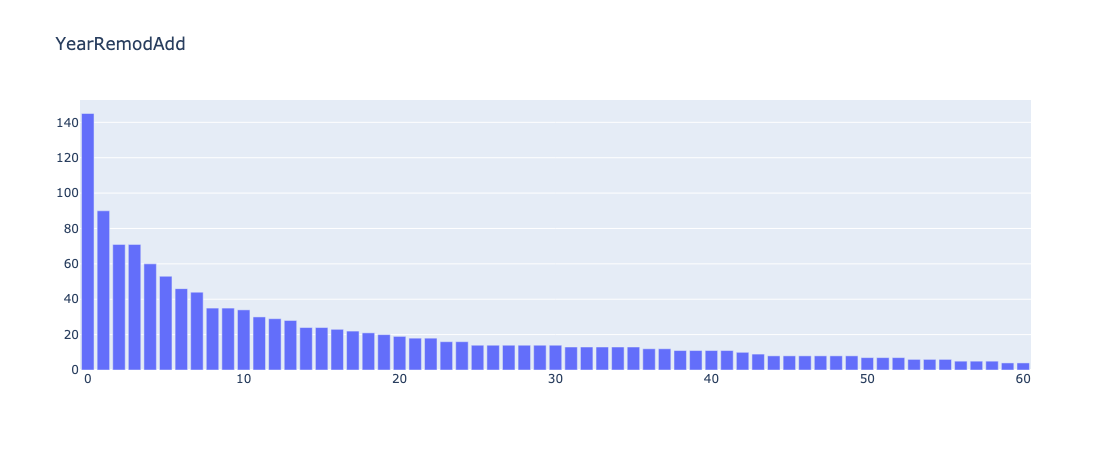

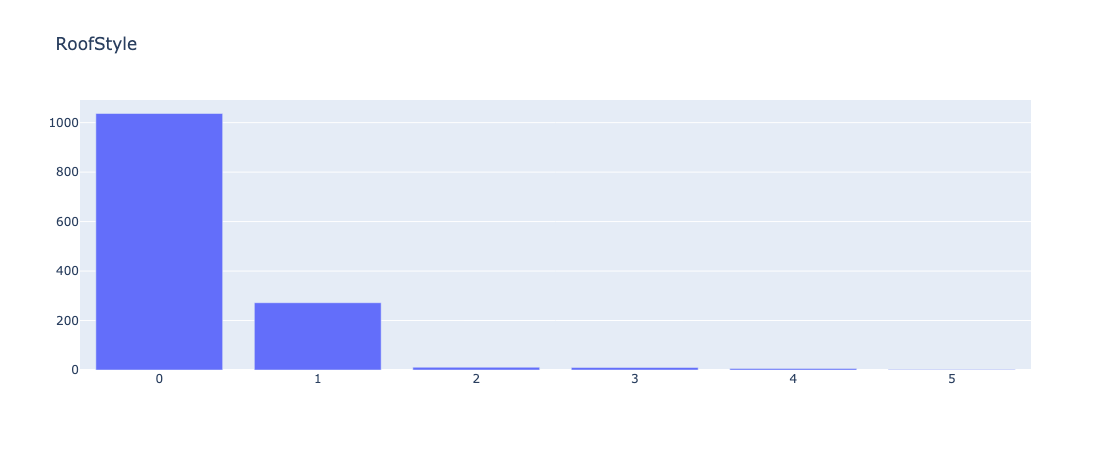

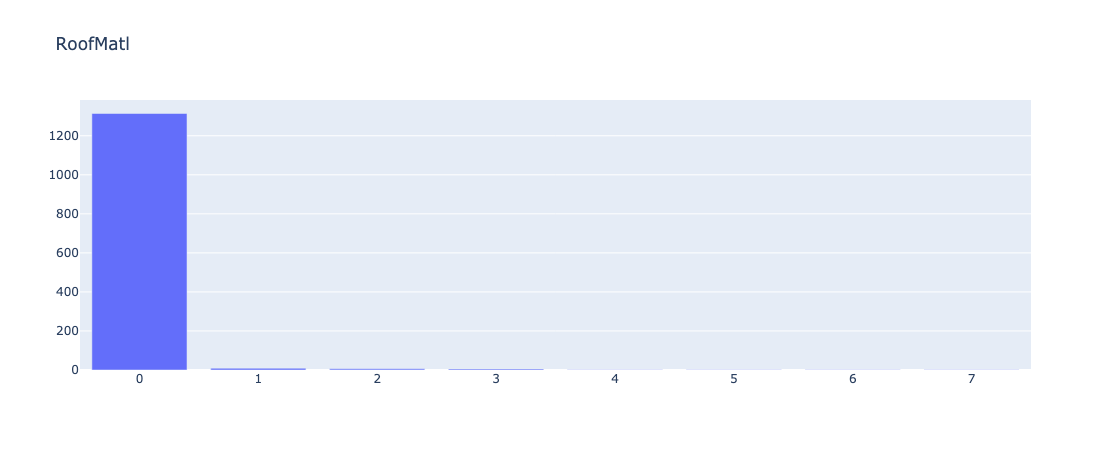

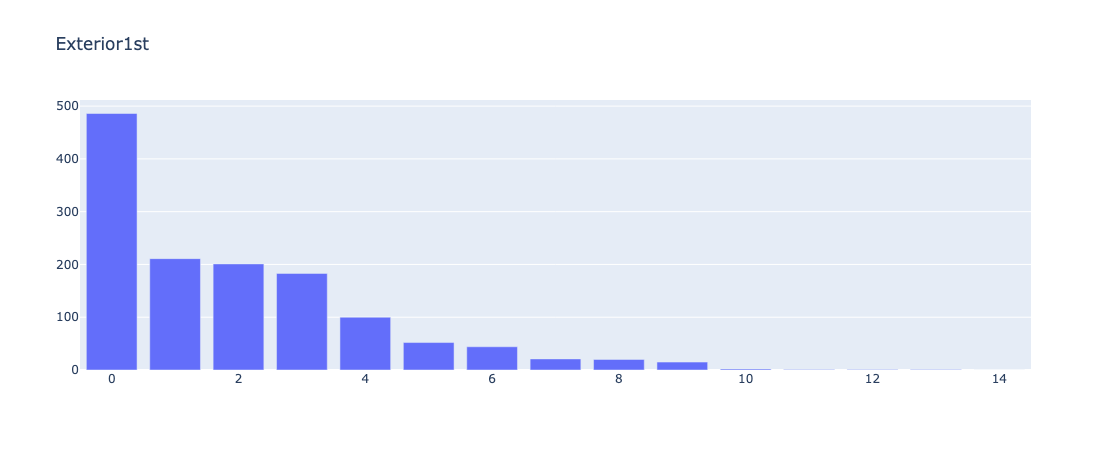

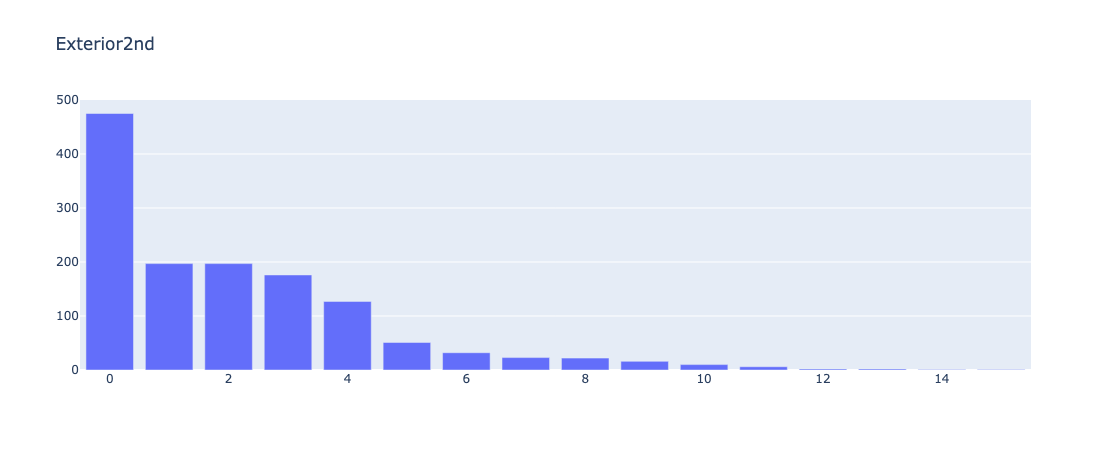

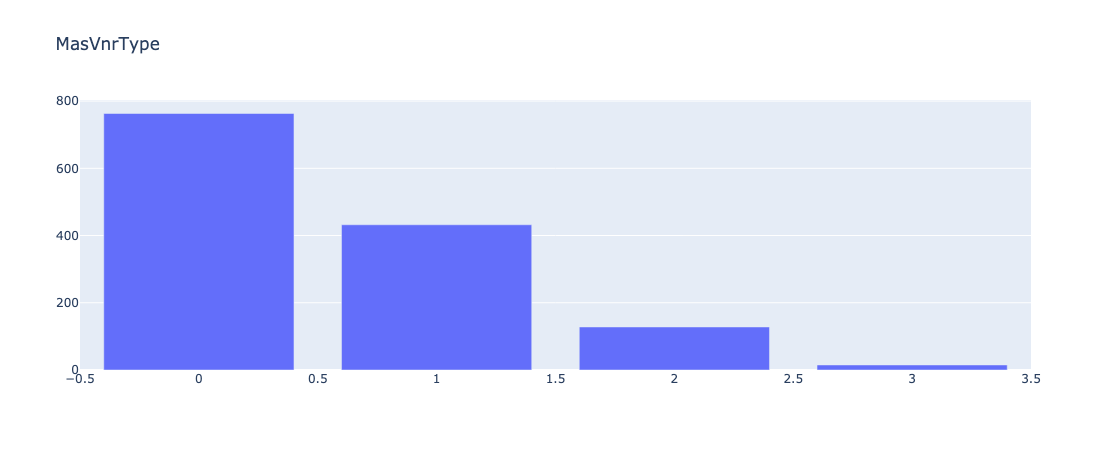

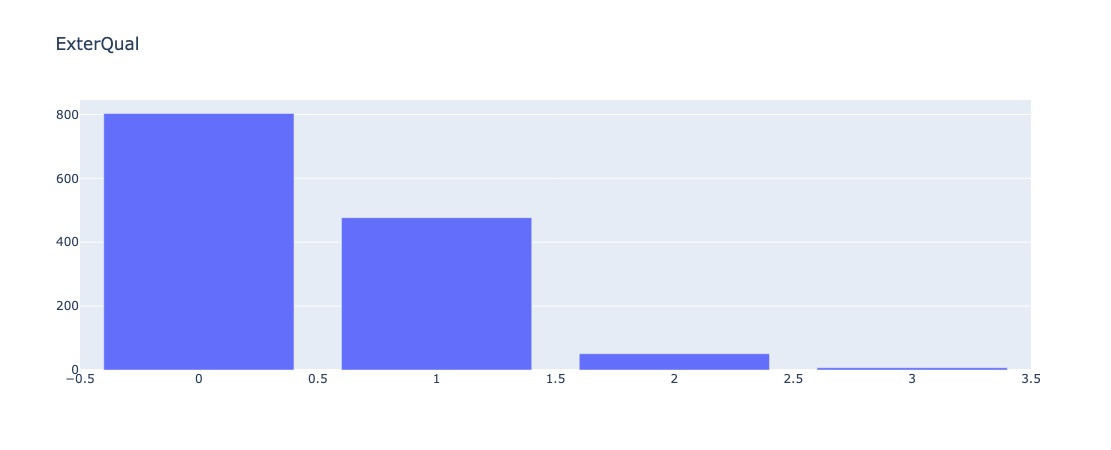

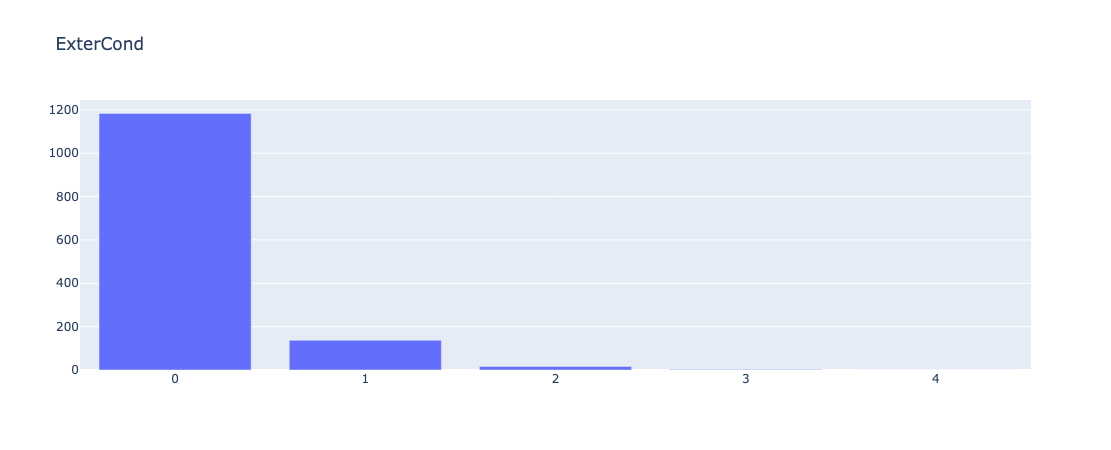

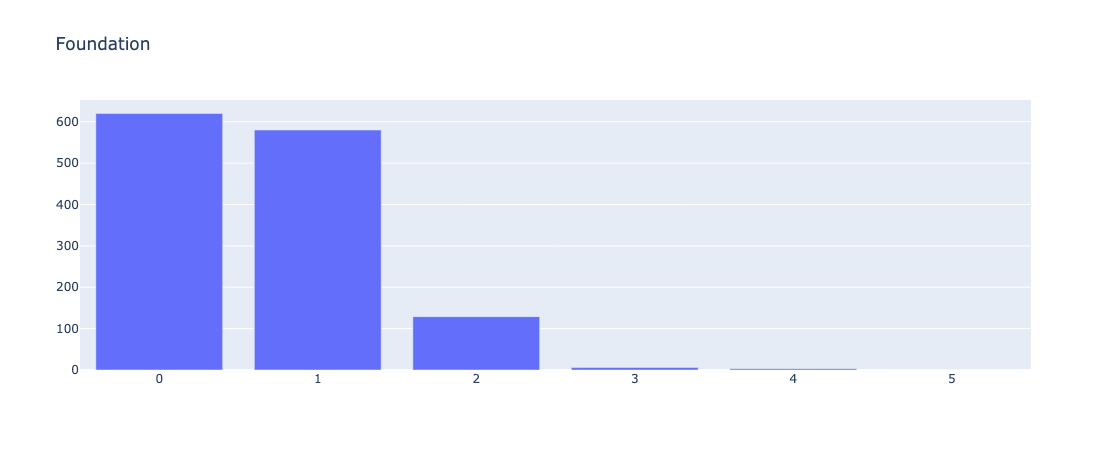

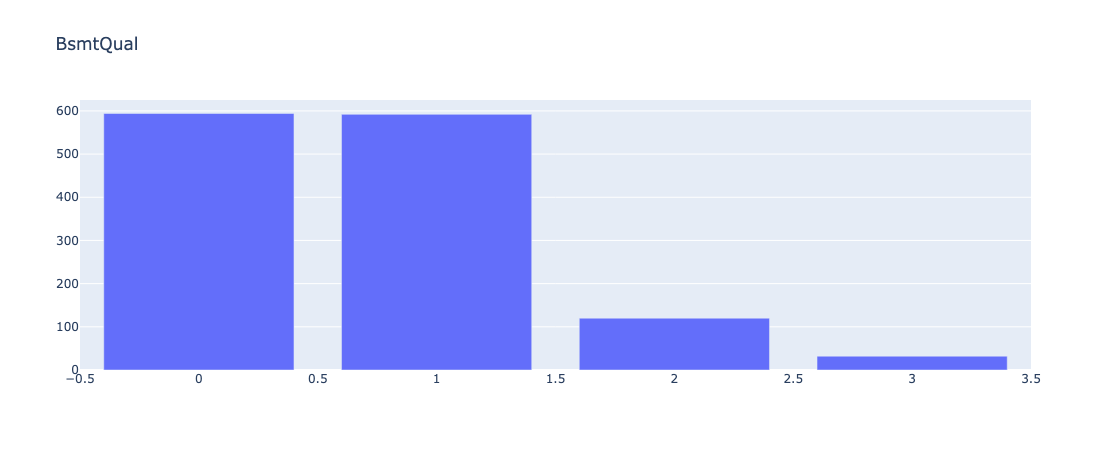

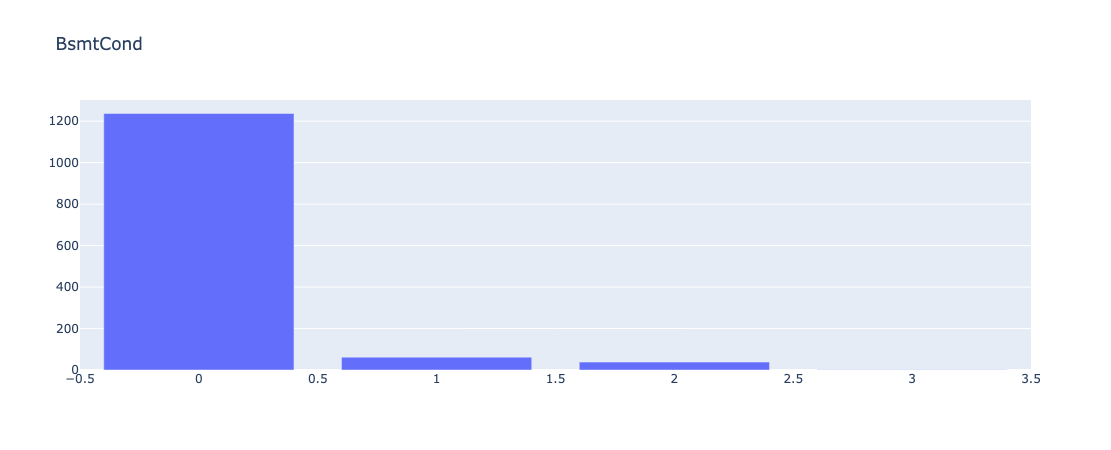

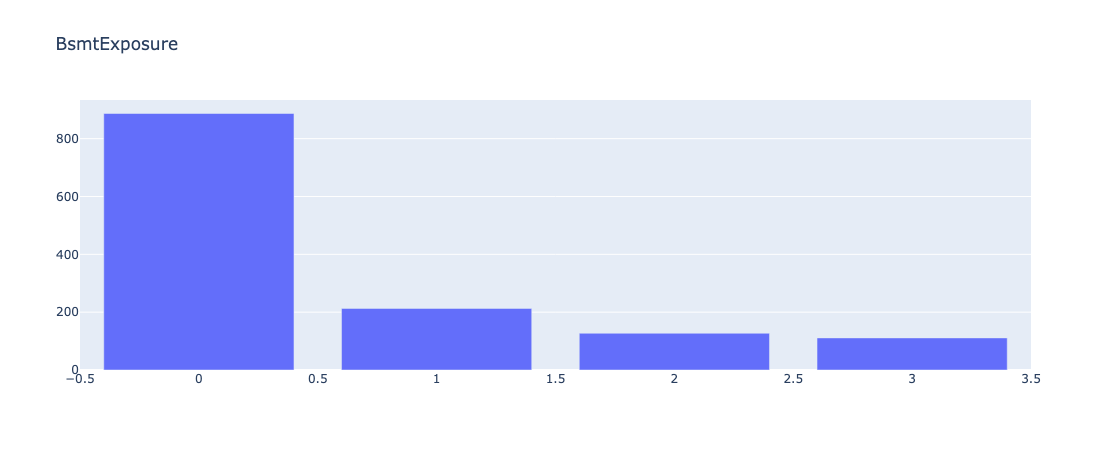

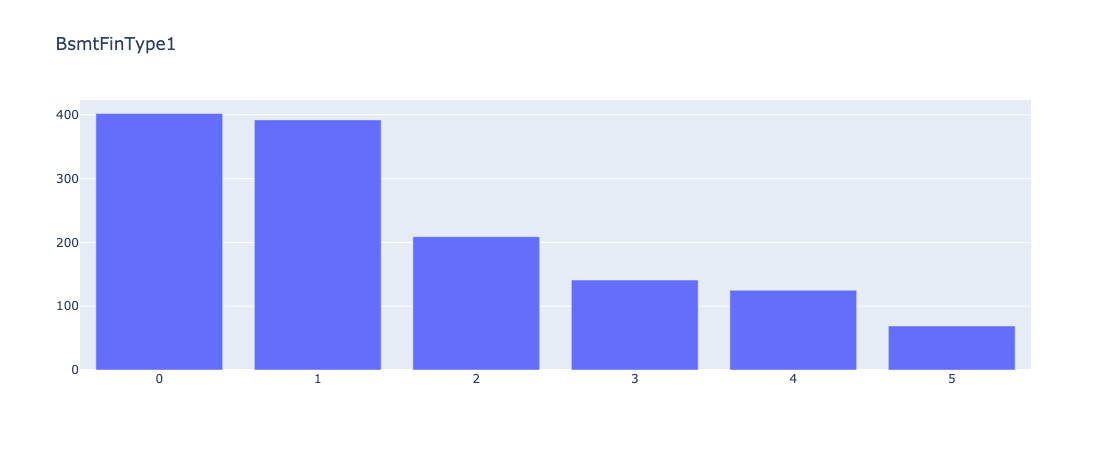

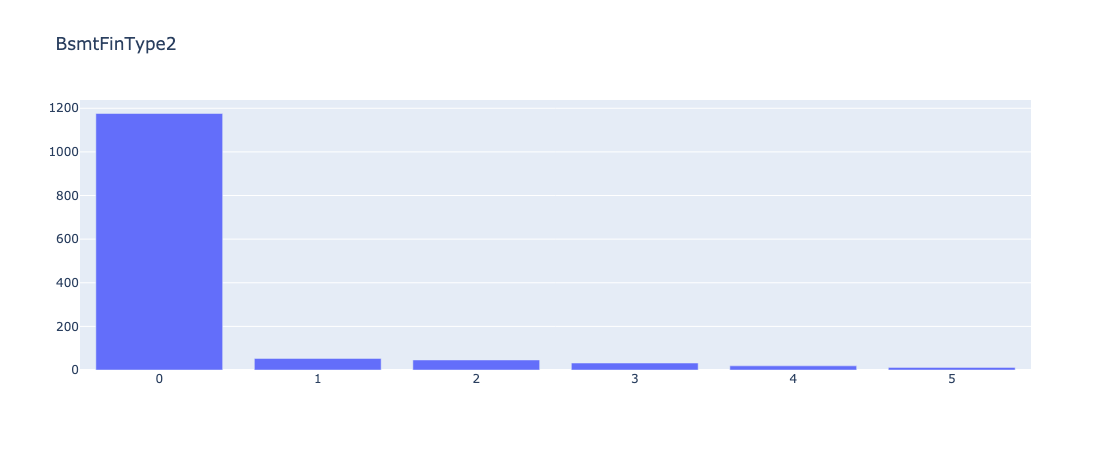

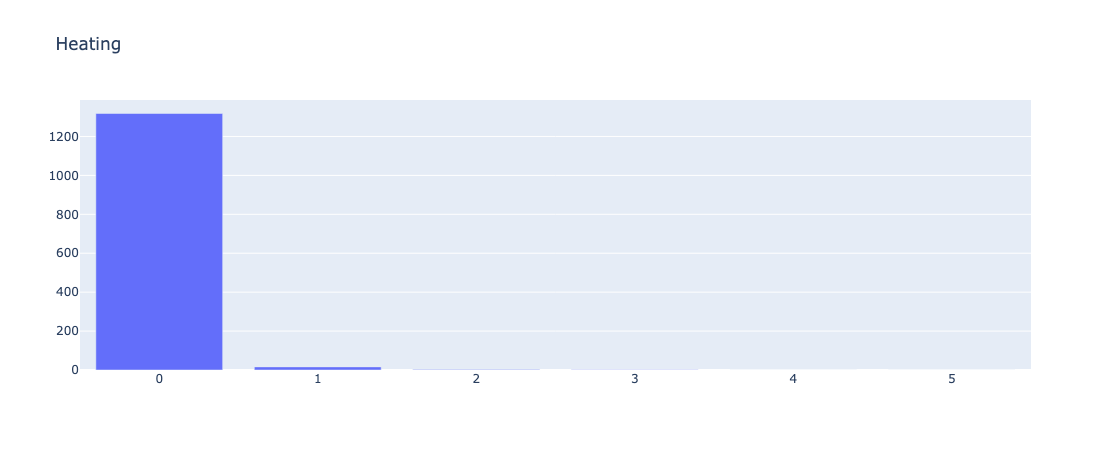

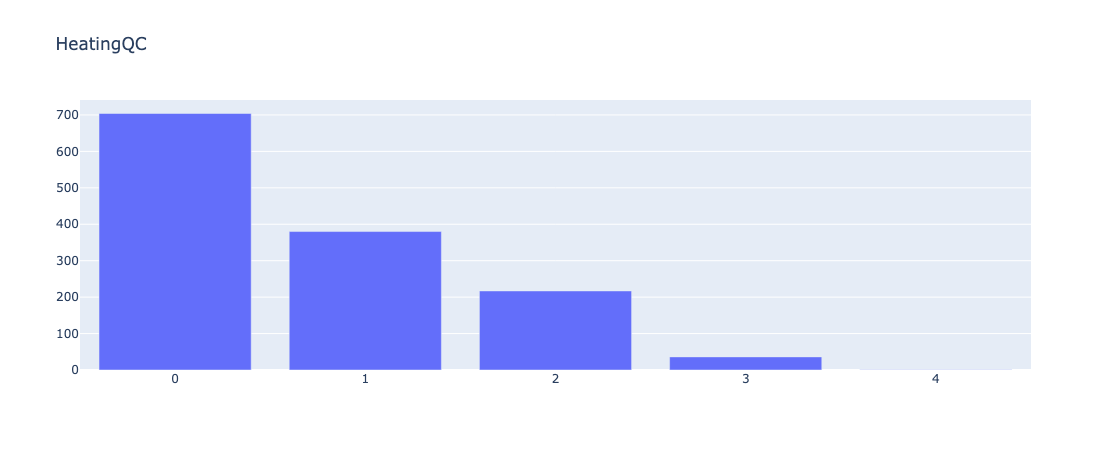

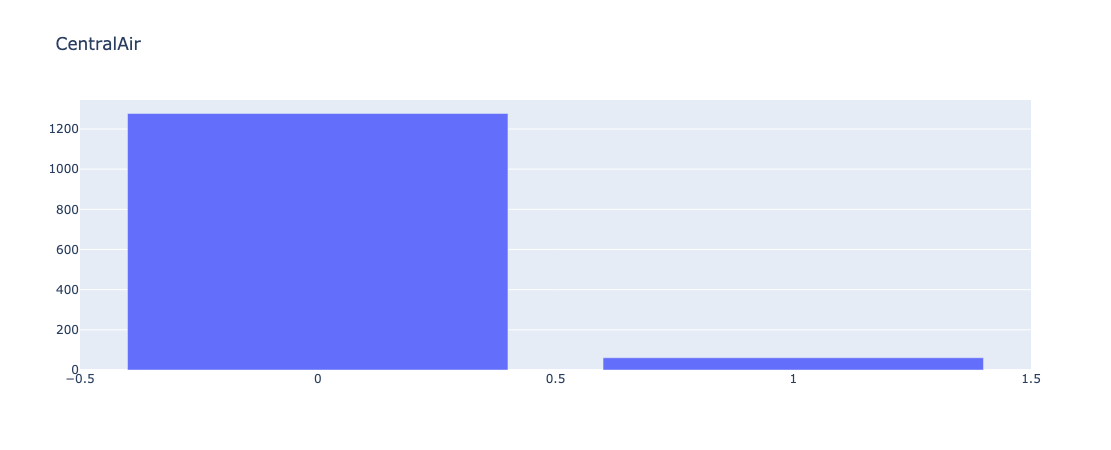

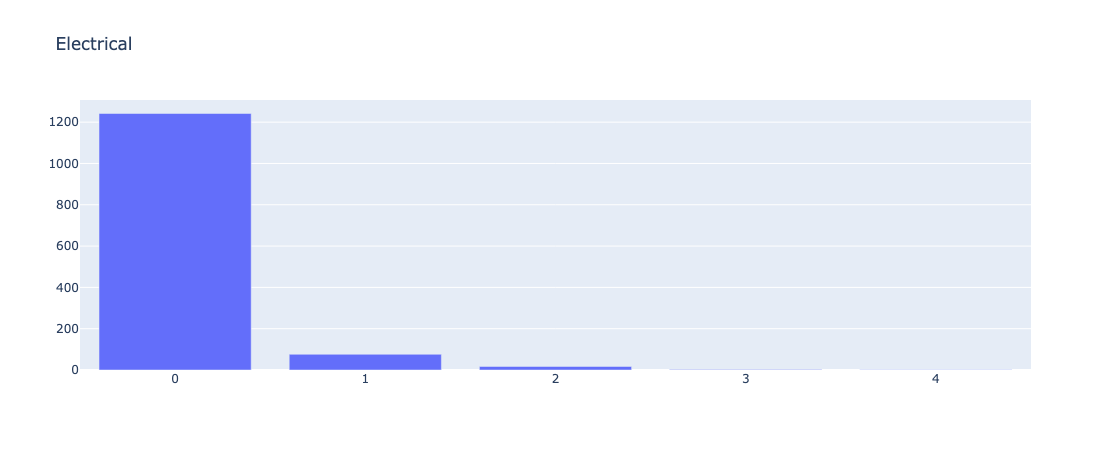

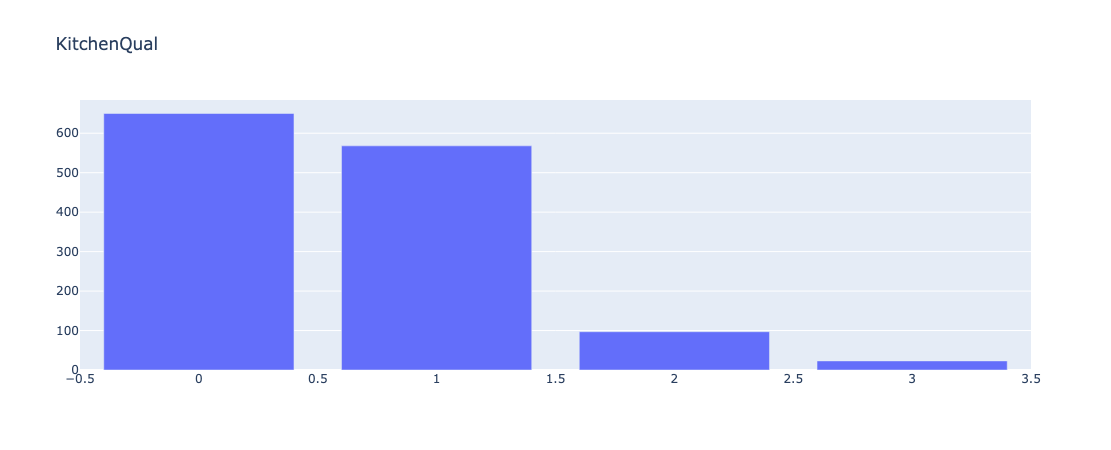

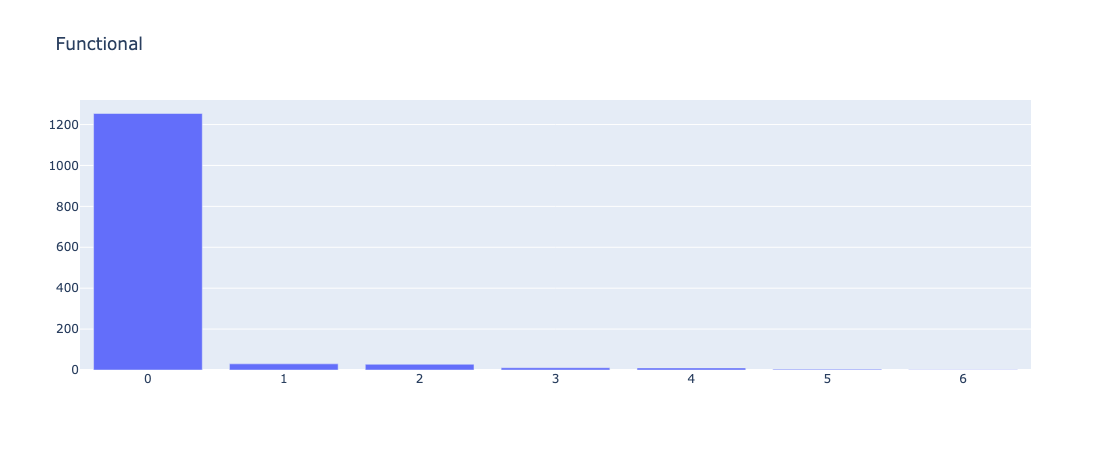

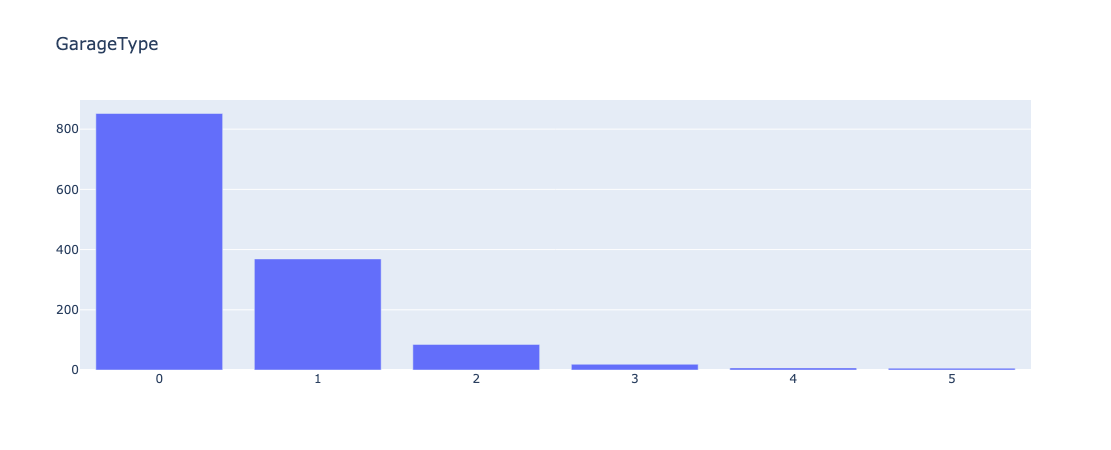

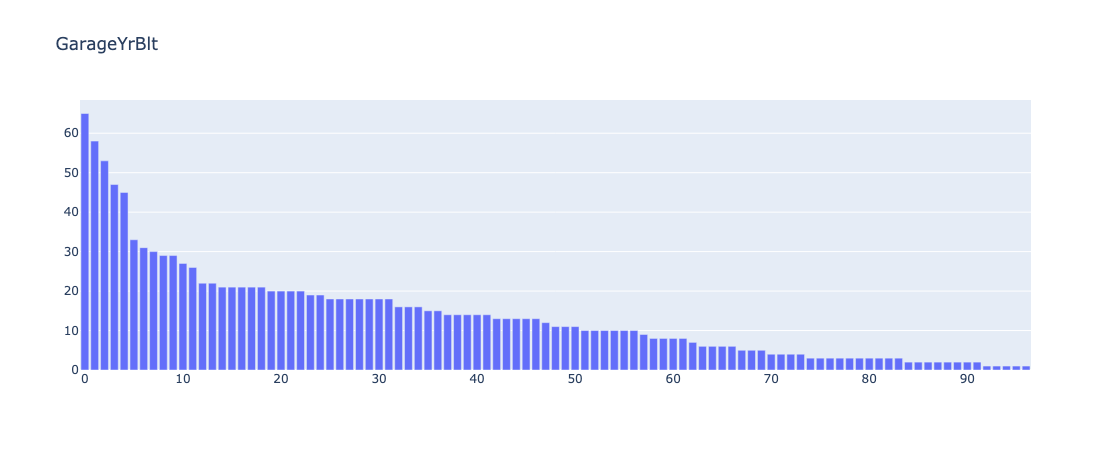

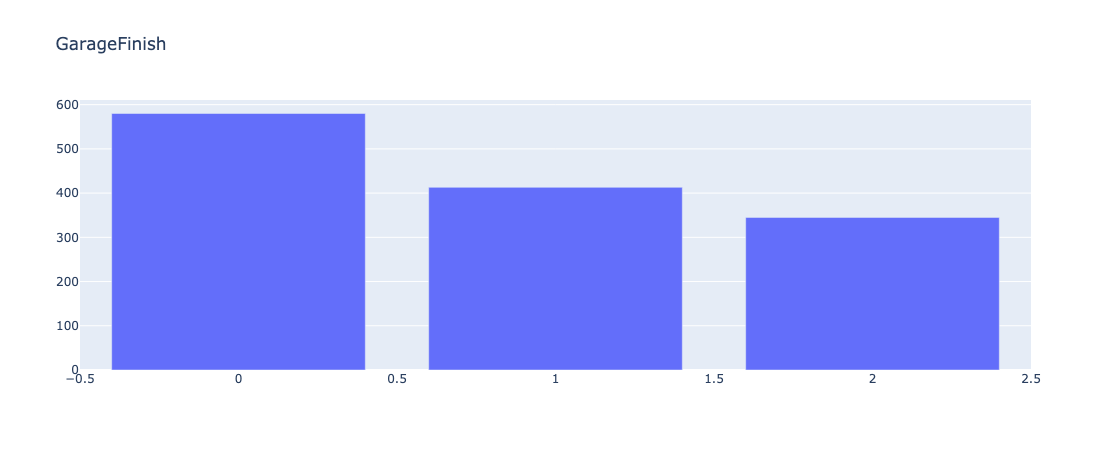

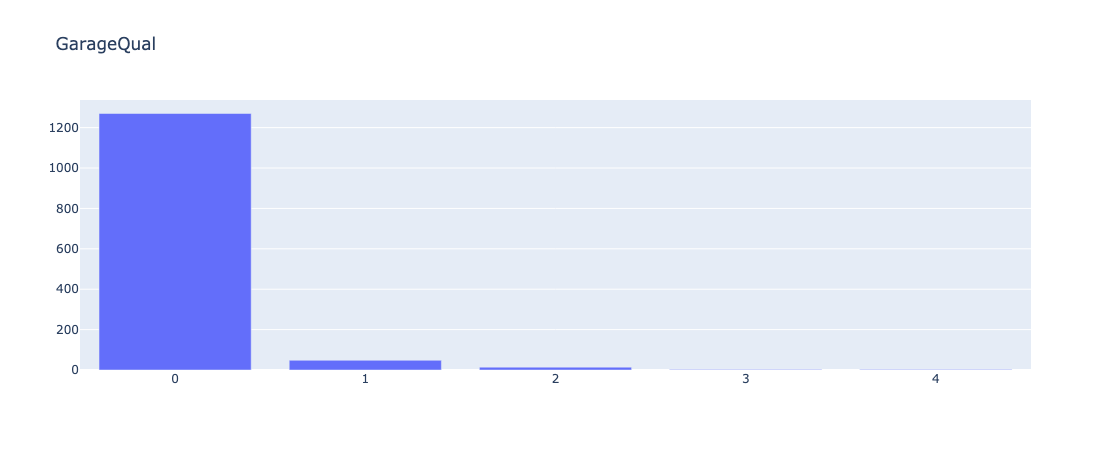

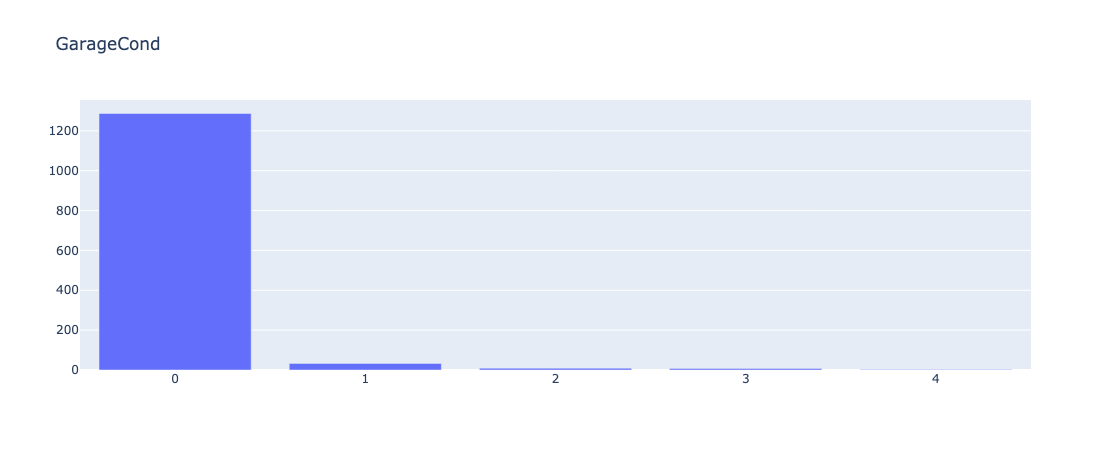

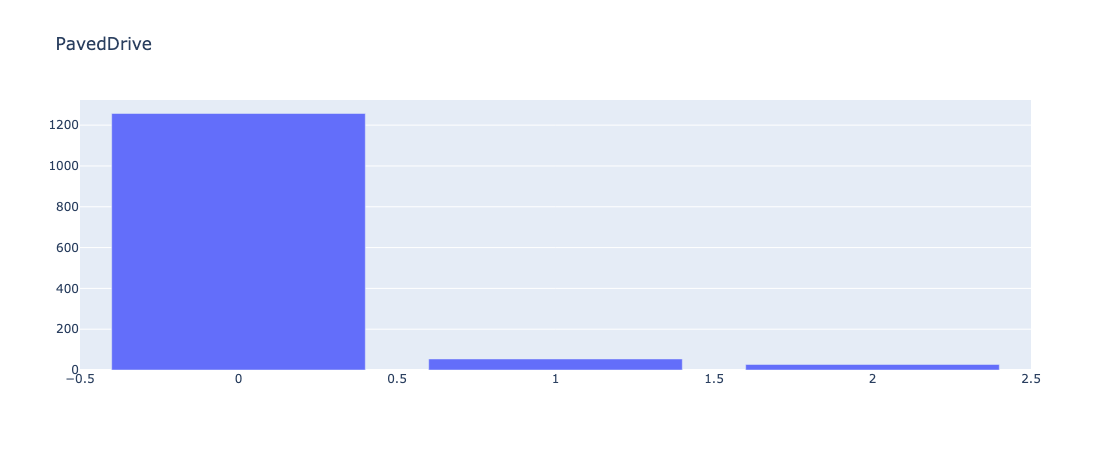

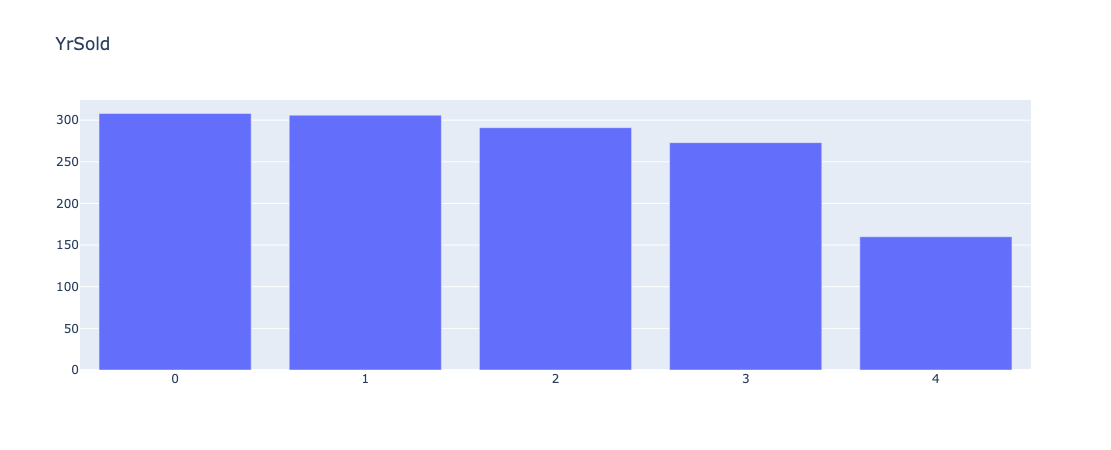

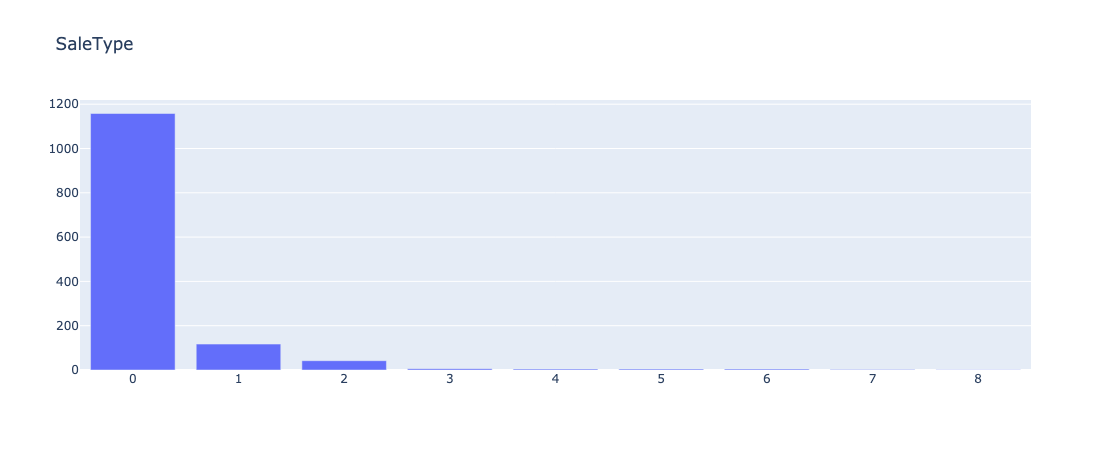

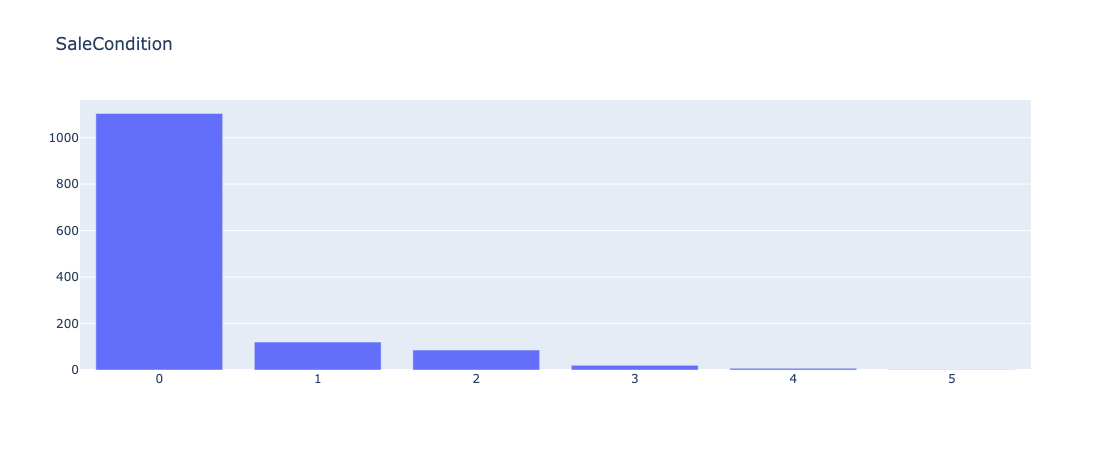

In [173]:
# iterate through multiple lines
for i in train.dtypes[train.dtypes=='category'].index:
    chart(col=i)

### Split data into feature (X) and target (y) variables

In [188]:
# define feature and target variable
y = train_nun['SalePrice']
X = train_nun.drop('SalePrice', axis=1)

In [189]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

### Normalize data

In [190]:
from sklearn.preprocessing import StandardScaler

In [206]:
# importar biblioteca para normalizar os dados
scaler = StandardScaler()

# fitar o modelo de normalização de acordo com o padrão dos dados
scaler.fit(X_train)

# efetivamente normalizar os dados
scaled_data = scaler.transform(X_train)

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

/Users/liviaclarete/.pyenv/versions/dataAnalysis/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [207]:
scaled_data.shape

(1003, 33)

### PCA

In [208]:
# importar a função PCA da biblioteca sklearn
from sklearn.decomposition import PCA

# instanciar a biblioteca e definir o número de componentes
pca = PCA(n_components=2, random_state=42)

# treinar o modelo de acordo com os dados normalizados
pca.fit(scaled_data)

# transformar os dados usando a função transform
x_pca = pca.transform(scaled_data)


In [209]:
x_pca.shape

(1003, 2)

In [216]:
y_train.shape

(1003,)

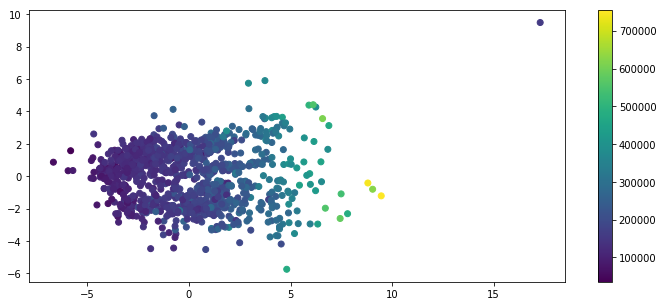

In [250]:
plt.figure(figsize=(12,5))
plt.scatter(x_pca[:,0],x_pca[:,1],
            # target variable
            c=y_train
           )
plt.colorbar();

### Linear regression

In [222]:
# instantiate LinearRegression class
lm = linear_model.LinearRegression()

# fit the model
lm.fit(X_train, y_train)

# evaluate
r2_train = lm.score(X_train, y_train)
r2_test = lm.score(X_test, y_test)
print('R2 no set de treino: %.2f' % r2_train)
print('R2 no set de teste: %.2f' % r2_test)

R2 no set de treino: 0.82
R2 no set de teste: 0.70


In [223]:
import statsmodels.api as sm

model = sm.regression.linear_model.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     1066.
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        16:55:55   Log-Likelihood:                -11919.
No. Observations:                1003   AIC:                         2.390e+04
Df Residuals:                     972   BIC:                         2.405e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
MSSubClass       -206.8650     34.939     

In [224]:
# Printando a intercepção
print(lm.intercept_)

-45930.117081385775


In [225]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
round(coeff_df,2)

Coefficient
MSSubClass           -196.48
LotFrontage          -135.00
LotArea                 0.50
OverallQual         17832.31
OverallCond          6211.17
MasVnrArea             37.99
BsmtFinSF1              7.06
BsmtFinSF2              1.06
BsmtUnfSF               0.72
TotalBsmtSF             8.84
1stFlrSF               18.87
2ndFlrSF               19.78
LowQualFinSF            3.48
GrLivArea              42.13
BsmtFullBath         9164.67
BsmtHalfBath         5615.14
FullBath            -1003.54
HalfBath            -7300.44
BedroomAbvGr       -11753.00
KitchenAbvGr       -26523.06
TotRmsAbvGrd         5213.15
GarageCars          18718.29
GarageArea             -5.54
WoodDeckSF             25.94
OpenPorchSF             2.96
EnclosedPorch          -2.06
3SsnPorch              18.11
ScreenPorch            69.84
MoSold                -92.14
AgeYearBuilt         -392.86
AgeYearRemodAdd      -103.36
AgeGarageYrBlt         35.25
AgeYrSold             315.95

In [226]:
predictions = lm.predict(X_test)

In [227]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df1= df.head(20)

In [243]:
actual = df.Actual.mean()
predicted = df.Predicted.mean()

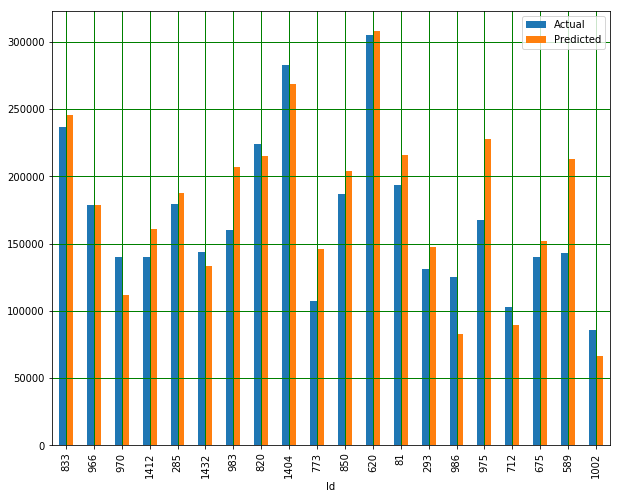

In [232]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='1', color='green')
plt.grid(which='minor', linestyle=':', linewidth='1', color='black')
plt.show()

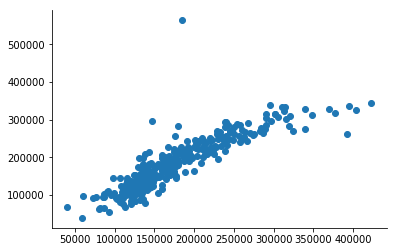

In [229]:
plt.scatter(y_test,predictions)
sns.despine()

In [230]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22249.259582224924
MSE: 1223975074.7684307
RMSE: 34985.355147095914


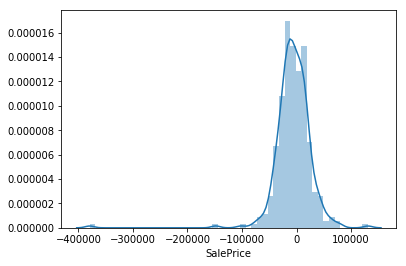

In [231]:
sns.distplot((y_test-predictions),bins=50);